In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6,4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import KNNImputer

from sklearn.tree import export_graphviz, export_text
from sklearn import tree

from sklearn.metrics import mean_absolute_error, PredictionErrorDisplay
import sklearn
sklearn.set_config(transform_output="pandas")


In [2]:
!pip install category_encoders -q

In [3]:
car_df = pd.read_csv('./adverts.csv')

In [4]:
car_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
car_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [7]:
car_df.loc[car_df['price'] >100000]


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
113,202009103575016,1568.0,19,Black,McLaren,Senna,USED,2019.0,585000,Coupe,False,Petrol
362,202005279588456,10.0,NaN,Blue,Land Rover,Range Rover,NEW,NaN,102473,SUV,False,Diesel
383,202007141227859,1.0,NaN,Black,BMW,X6M,NEW,NaN,107490,SUV,False,Petrol
395,202008092275974,16050.0,14,Black,Ferrari,458,USED,2014.0,139990,Coupe,False,Petrol
461,202009143722697,10600.0,64,Silver,Rolls-Royce,Wraith,USED,2014.0,117500,Coupe,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401532,202010064684488,0.0,NaN,NaN,Land Rover,Range Rover,NEW,NaN,103265,SUV,False,Diesel
401566,202010134939512,552.0,69,Red,Ferrari,488 Pista,USED,2019.0,310830,Coupe,False,Petrol
401708,202002217579329,3000.0,19,Green,Mercedes-Benz,G Class,USED,2019.0,141950,SUV,False,Petrol
401716,202003308800352,900.0,16,Yellow,Lamborghini,Aventador,USED,2016.0,279990,Convertible,False,Petrol


In [8]:
car_df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [9]:
car_df.corr()

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.034941,0.021617,-0.052344,-0.026169
mileage,0.034941,1.000000,-0.375541,-0.160204,0.033543
year_of_registration,0.021617,-0.375541,1.000000,0.102341,-0.011155
price,-0.052344,-0.160204,0.102341,1.000000,0.010402
crossover_car_and_van,-0.026169,0.033543,-0.011155,0.010402,1.000000


In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [11]:
car_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [12]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [13]:
car_df.describe().round(2)

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.00,368694.00,402005.00
mean,2.020071e+14,37743.60,2015.01,17341.97
std,1.691662e+10,34831.72,7.96,46437.46
min,2.013072e+14,0.00,999.00,120.00
25%,2.020090e+14,10481.00,2013.00,7495.00
50%,2.020093e+14,28629.50,2016.00,12600.00
75%,2.020102e+14,56875.75,2018.00,20000.00
max,2.020110e+14,999999.00,2020.00,9999999.00


In [14]:
car_df.shape

(402005, 12)

In [15]:
car_df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [16]:
car_df['year_of_registration'].describe()

#The min year, is an incorrect values

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [17]:
car_df['vehicle_condition'].value_counts()

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64

In [18]:
car_df['crossover_car_and_van'].value_counts()

False    400210
True       1795
Name: crossover_car_and_van, dtype: int64

In [19]:
car_df[['standard_make']].value_counts()

#BMW car were mostly sold

standard_make
BMW              37376
Audi             35280
Volkswagen       34246
Vauxhall         33700
Mercedes-Benz    31917
                 ...  
Pagani               1
Panther              1
Reliant              1
Radical              1
International        1
Length: 110, dtype: int64

In [20]:
car_df['fuel_type'].value_counts()

#Higher number of Petrol Vehicles were mostly sold

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

In [21]:
# car_df['vehicle_condition'].value_counts()

In [22]:
# I can deduce here that all new vehicles are not registered
# The mileage can be used to determined if a vehicle is new or not
# All new vehicles have their mileage below 100
mil = car_df[car_df['vehicle_condition']=='NEW'] #31249
mil[mil['mileage']<=100]
#Also they are all less than 100

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [23]:
car_df.corr()

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.034941,0.021617,-0.052344,-0.026169
mileage,0.034941,1.000000,-0.375541,-0.160204,0.033543
year_of_registration,0.021617,-0.375541,1.000000,0.102341,-0.011155
price,-0.052344,-0.160204,0.102341,1.000000,0.010402
crossover_car_and_van,-0.026169,0.033543,-0.011155,0.010402,1.000000


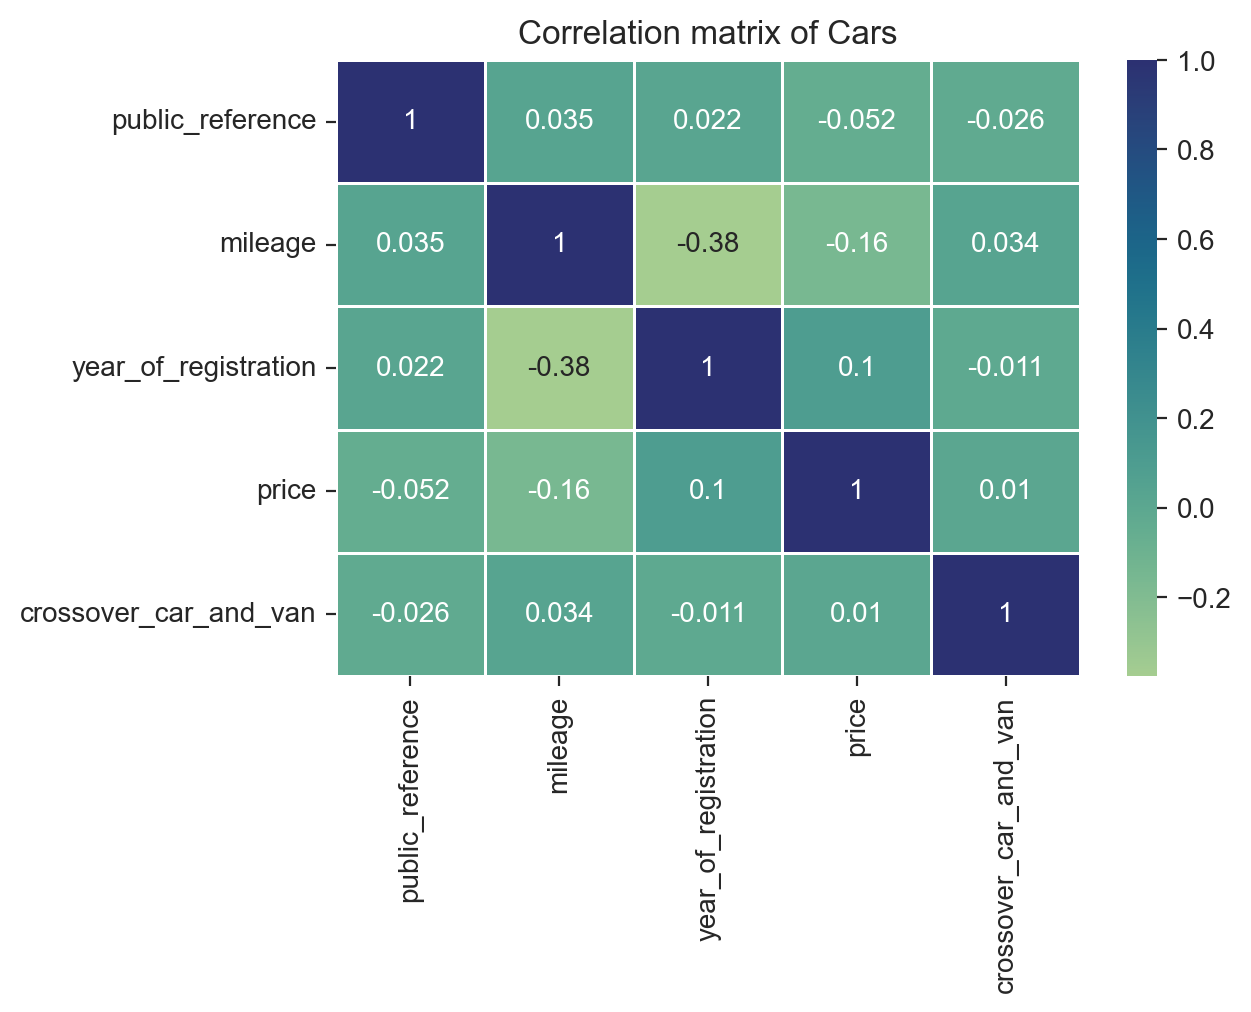

In [24]:
sns.heatmap(car_df.corr(), annot=True, cmap='crest', linewidth=.5);
plt.title('Correlation matrix of Cars');
plt.show();

#these are quantitative features, and their correlation are measure using heatmap to visualize

<Axes: xlabel='fuel_type', ylabel='body_type'>

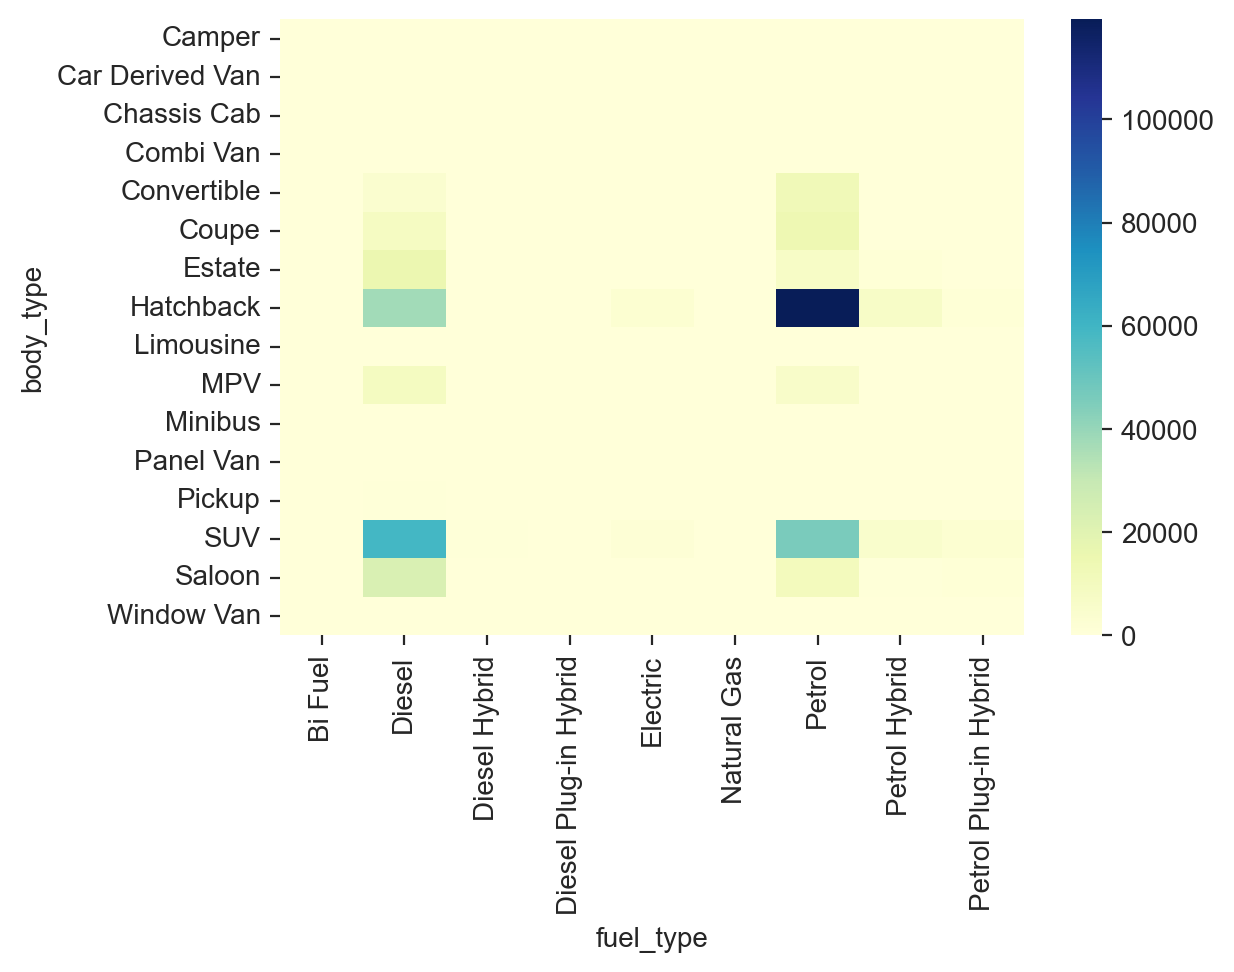

In [25]:
#To visualize the categorical volumns, it has been seen above
#the heatmap plotted for numerical columns
# Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
#        'standard_make', 'standard_model', 'vehicle_condition',
#        'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
#        'fuel_type'],
#       dtype='object')

#Quantitative features
cat_col = [ 'standard_colour',
           'standard_make', 'standard_model', 
           'body_type','vehicle_condition', 'fuel_type' ]
cat_car_df = car_df[cat_col]
# cat_car_df.head()
cross_tab = pd.crosstab(cat_car_df['body_type'], cat_car_df['fuel_type'])


sns.heatmap(cross_tab, cmap='YlGnBu')

#This indicates that the hatchback using petrol are mostly the most purchased vehicle

In [26]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

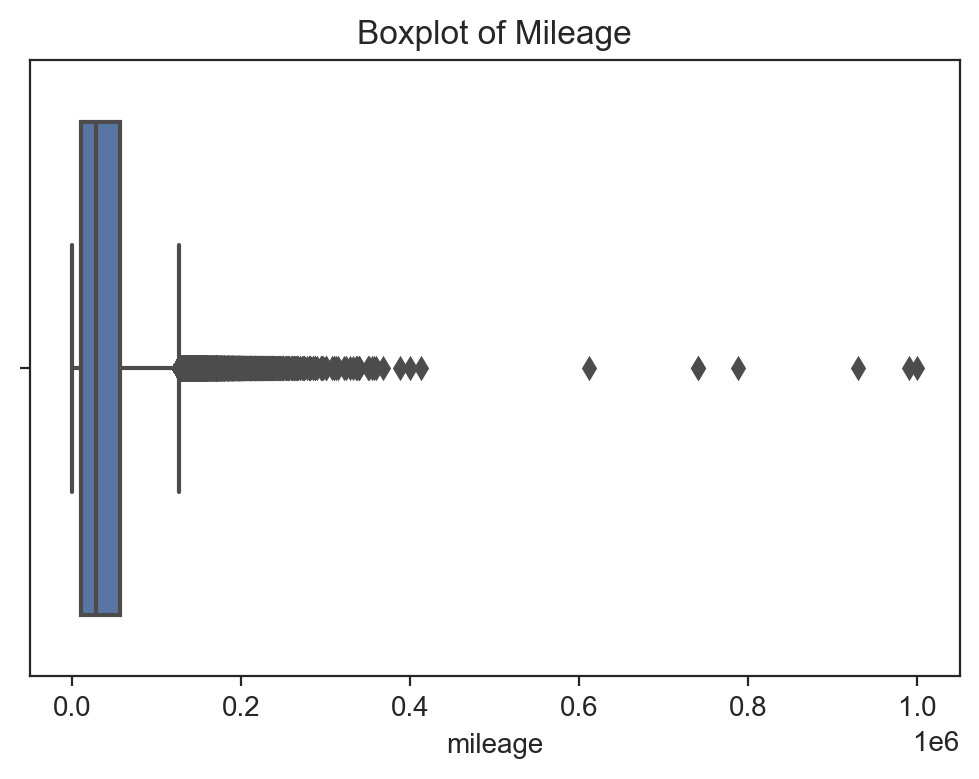

In [27]:
sns.boxplot(data=car_df, x='mileage');
plt.title('Boxplot of Mileage');
# The median is around 28000 mileage, the interquatile range is bwtween 10000 and 55000


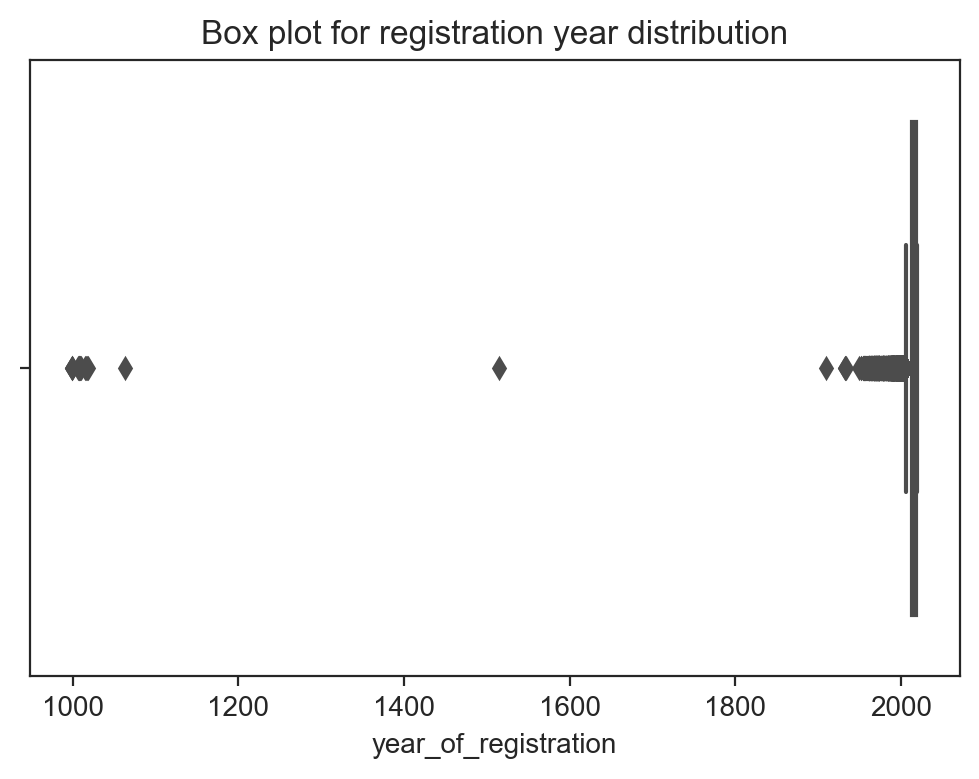

In [28]:
sns.boxplot(data=car_df, x='year_of_registration');
plt.title('Box plot for registration year distribution');
#The plot shows that there are outliers and this data needs cleaning
#The max price is around 1000000

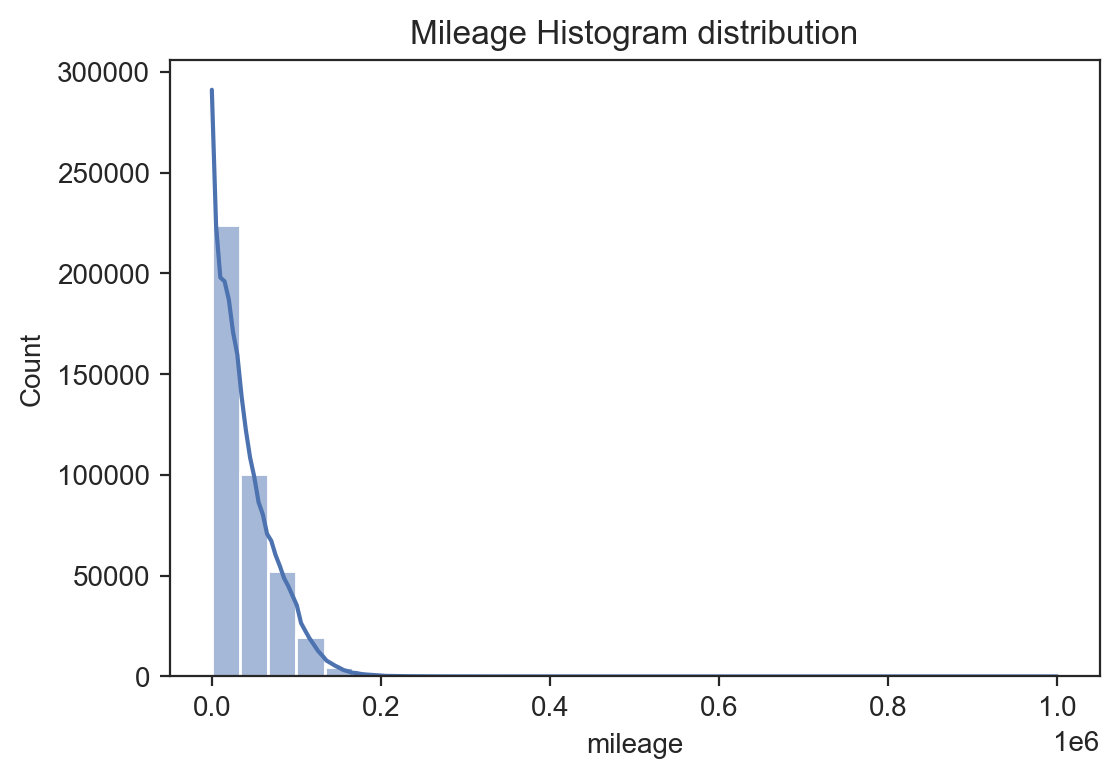

In [29]:
sns.histplot(car_df['mileage'], bins=30, kde=True);
plt.title('Mileage Histogram distribution');

#The frequency decreasees as the mileage increases

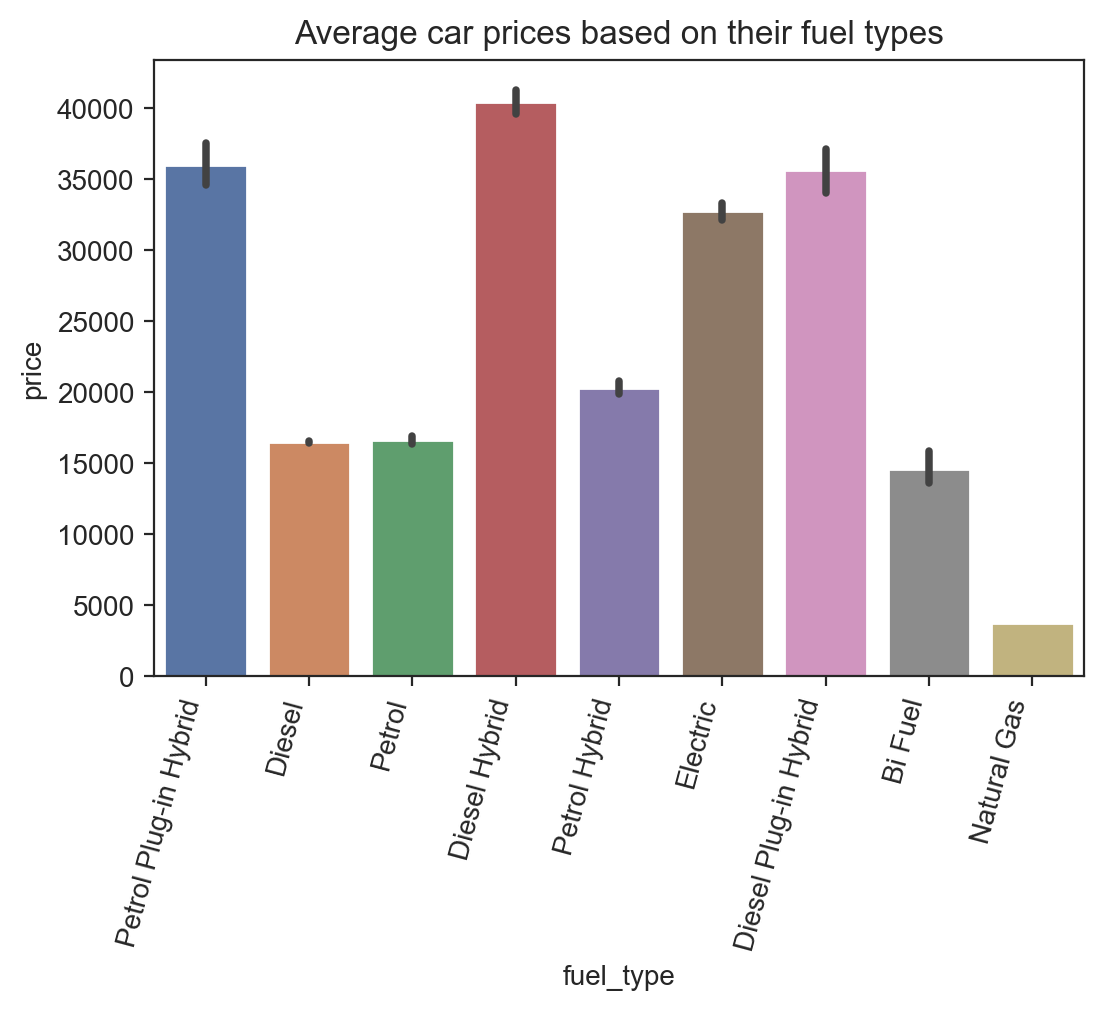

In [30]:
ax = sns.barplot(data=car_df, x='fuel_type', y='price');
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right");
plt.title('Average car prices based on their fuel types');
plt.show();


#This plot shows that Diesel Hybrid cars are more expensive 
# while bi fuel are cheaper, checking the average price 

In [31]:
car_df.loc[car_df['fuel_type'] == 'Diesel Hybrid'].mean()

public_reference         2.020072e+14
mileage                  1.491120e+04
year_of_registration     2.018292e+03
price                    4.046916e+04
crossover_car_and_van    0.000000e+00
dtype: float64

DATA PROCESSING FOR MACHINE LEARNING

In [32]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [33]:
# fig, ax = plt.subplots(1, 3, figsize=(6,4))
# sns.boxplot(data=car_df, x='mileage', y='price', ax=ax[0])
# sns.boxplot(data=car_df, x='mileage', y='price', ax=ax[1])
# sns.boxplot(data=car_df, x='mileage', y='price', ax=ax[2])

In [34]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

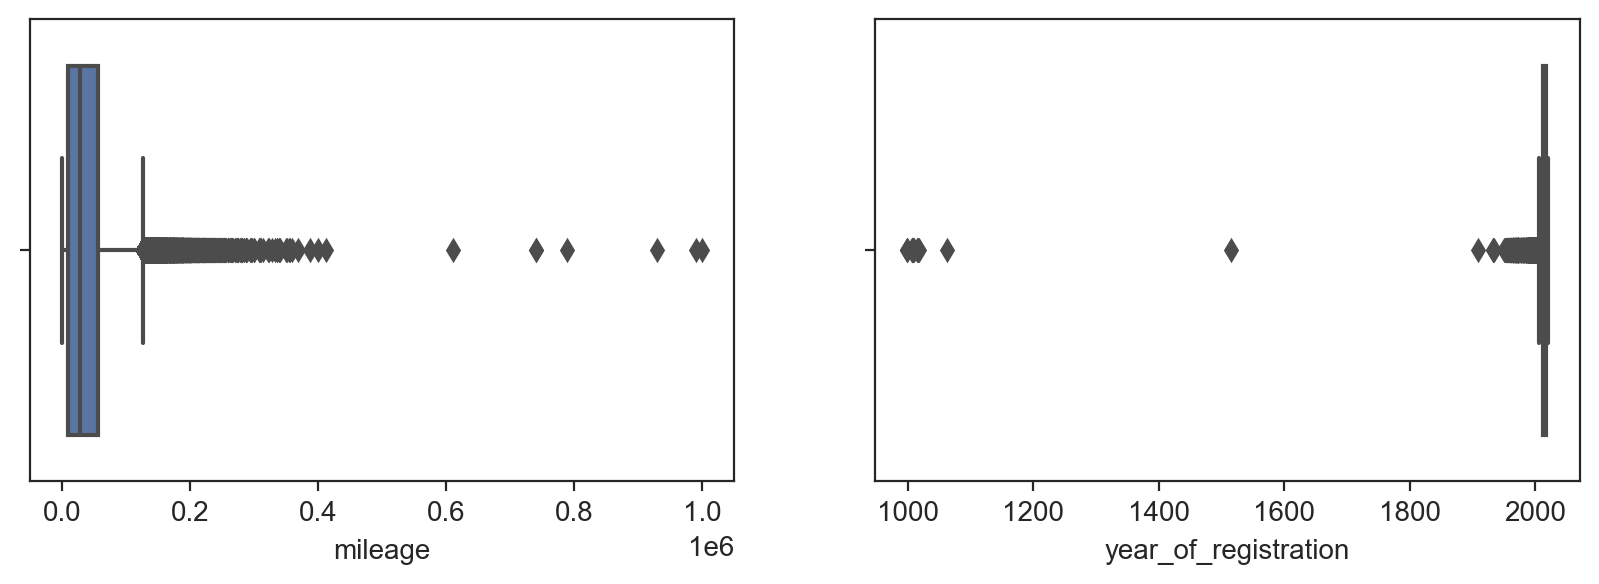

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,3));
sns.boxplot(data=car_df, x='mileage', ax=ax[0]);
sns.boxplot(data=car_df, x='year_of_registration', ax=ax[1]); 
# sns.boxplot(data=car_df, x='price', ax=ax[1]);


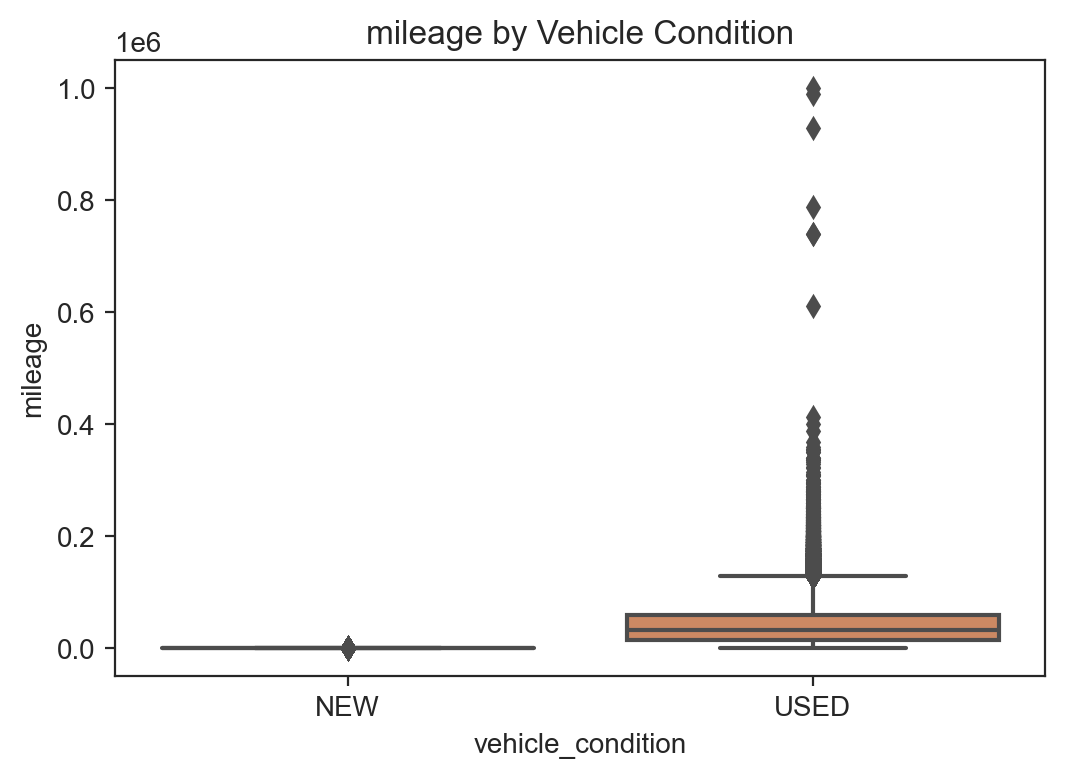

In [36]:
sns.boxplot(data=car_df, x='vehicle_condition', y='mileage')
# ax.set_xticklabels(rotation=75, ha="right")
plt.title("mileage by Vehicle Condition")

plt.show()

In [37]:
car_df.query('year_of_registration <= 2000')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
25,202008042070611,49585.0,B,NaN,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol
280,202010185150348,171000.0,W,Red,Toyota,Yaris Verso,USED,2000.0,495,Hatchback,False,Petrol
312,202010265438664,44163.0,W,Silver,Volkswagen,Beetle,USED,2000.0,1100,Hatchback,False,Petrol
426,202009033275983,175000.0,J,Blue,Mercedes-Benz,SEC Series,USED,1991.0,19990,Coupe,False,Petrol
667,201912024961333,99000.0,X,Blue,Volvo,V40,USED,2000.0,1295,Estate,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400664,202006109989307,5800.0,A,Blue,Fiat,500,USED,1963.0,9500,Saloon,False,Petrol
400710,202008142471790,150000.0,R,Green,Toyota,Picnic,USED,1998.0,1495,MPV,False,Petrol
400724,202008242879192,0.0,L,Silver,Porsche,911,USED,1973.0,175000,NaN,False,Petrol
401128,202009203972304,36000.0,M,White,Rolls-Royce,Silver Shadow,USED,1973.0,7495,Saloon,False,Petrol


In [38]:
car_df['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

<Axes: xlabel='mileage', ylabel='Count'>

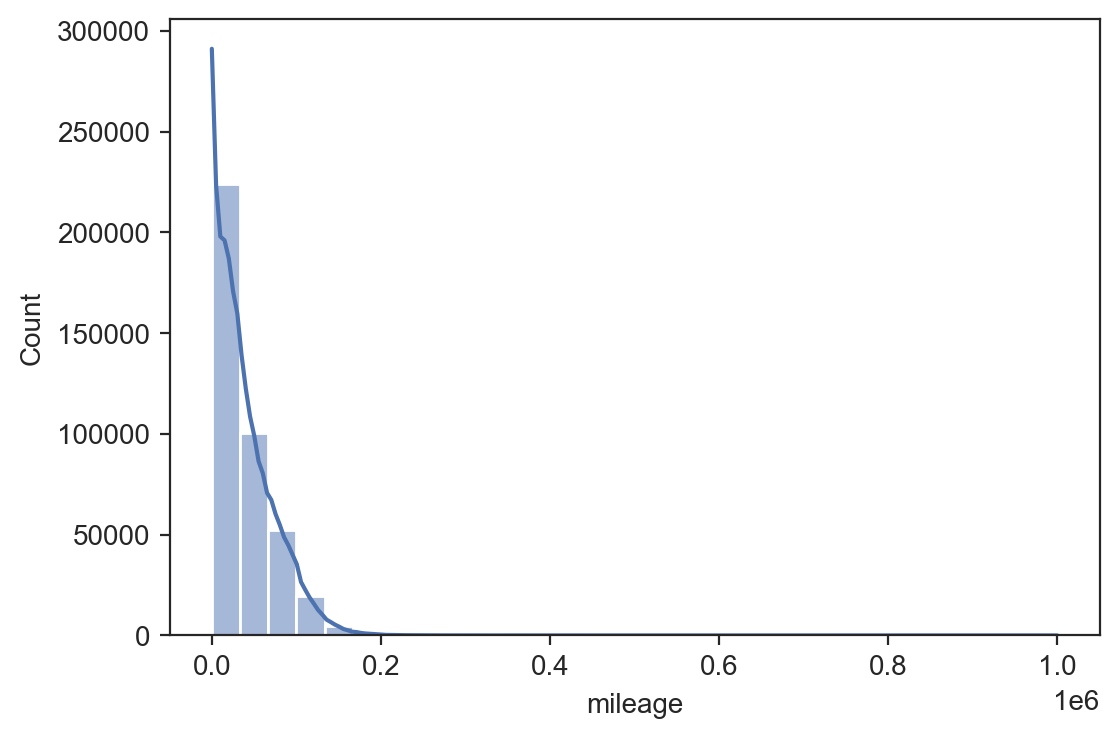

In [39]:
sns.histplot(data = car_df, x='mileage', bins=30,kde=True)


In [40]:
# Removing outliers using in the mileage feature, this is positively skewed

Q1 = car_df['mileage'].quantile(0.25)
Q3 = car_df['mileage'].quantile(0.75)
IQR = Q3 - Q1
car_df = car_df[(car_df['mileage'] >= Q1 - 1.5 * IQR) & (car_df['mileage'] <= Q3 + 1.5 * IQR)]
print("lower_limit:" ,Q1 - 1.5 * IQR, "upper_limit: ", Q3 + 1.5 * IQR)

lower_limit: -59111.125 upper_limit:  126467.875


<Axes: xlabel='mileage'>

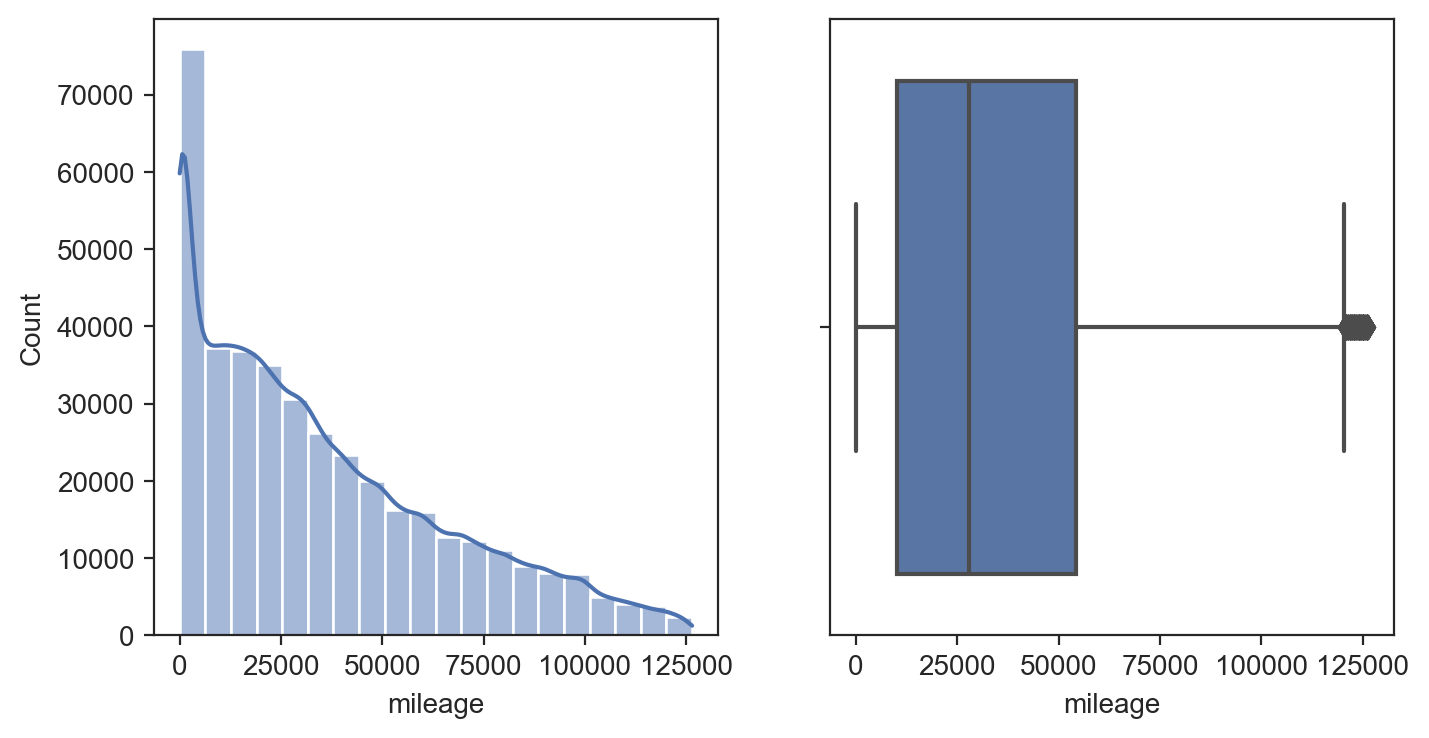

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4));
sns.histplot(data = car_df, x='mileage', bins=20,kde=True, ax=ax[0])
sns.boxplot(x=car_df['mileage'], ax=ax[1])

In [42]:
# Q1 = car_df['year_of_registration'].quantile(0.25)
# Q3 = car_df['year_of_registration'].quantile(0.75)
# IQR = Q3 - Q1
# car_df = car_df[(car_df['year_of_registration'] >= Q1 - 3 * IQR) & (car_df['year_of_registration'] <= Q3 + 3 * IQR)]


In [43]:
#All new cars with no year of reg has been replaced with 2021
#since all new vehicles were not registered and has no reg_code

#Here i want to fill in the null in the year of registeration for vehicles that are new,
#since the max year of the car_df is 2020, so i can fill in the year of new cars with 2021
#therefore any cars having 2021 is new
car_df.loc[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW'), 
           'year_of_registration'] = 2021

In [44]:
#I will extract the missing year of registration from the reg_code

ext_year = car_df[car_df['year_of_registration'].isnull() 
       & car_df['reg_code'].str.isdigit()]


In [45]:
ext_year['reg_code'] = ext_year['reg_code'].astype('int64')

In [46]:
mask = ext_year['reg_code'] >= 50
ext_year.loc[mask, 'year_of_registration'] = 2000 + (ext_year.loc[mask, 'reg_code'] - 50)

mask_2 = ext_year['reg_code'] < 50
ext_year.loc[mask_2, 'year_of_registration'] = 2000 + (ext_year.loc[mask_2, 'reg_code'])


In [47]:
#Convert back to its original data typ because we need to merge
ext_year['reg_code'] = ext_year['reg_code'].astype('object')

In [48]:
car_df.update(ext_year['year_of_registration'])


In [49]:
car_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31811
standard_colour           5213
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       347
price                        0
body_type                  810
crossover_car_and_van        0
fuel_type                  590
dtype: int64

In [50]:
car_df.drop(columns=['public_reference','reg_code'], inplace=True)

In [51]:
# There might be some duplicated in the data, so let's remove it
car_df.duplicated().sum()

8716

In [52]:
car_df.drop_duplicates(inplace=True)

In [53]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384981 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                384981 non-null  float64
 1   standard_colour        380010 non-null  object 
 2   standard_make          384981 non-null  object 
 3   standard_model         384981 non-null  object 
 4   vehicle_condition      384981 non-null  object 
 5   year_of_registration   384636 non-null  float64
 6   price                  384981 non-null  int64  
 7   body_type              384190 non-null  object 
 8   crossover_car_and_van  384981 non-null  bool   
 9   fuel_type              384435 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 29.7+ MB


In [54]:
# Filling of missing numbers using various techinques depending on the data

#In reg code, the usage of number started in the year 2000, meaning that those before 2000 were in alphabets
# Here, I am filling the reg code and the year of registration by fillling the null values wit
#the values of the forward rows to filll in

# car_df['reg_code'].fillna(method='ffill', inplace=True)
# car_df['year_of_registration'].fillna(method='ffill', inplace=True)

#since these are categorical values, i majorly filled them with the mode values
car_df['standard_colour'].fillna(car_df['standard_colour'].mode()[0], inplace=True)
car_df['body_type'].fillna(car_df['body_type'].mode()[0], inplace=True)
car_df['fuel_type'].fillna(car_df['fuel_type'].mode()[0], inplace=True)


In [55]:
# car_df[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW')]
#Here i want to fill in the null in the year of registeration for vehicles that are new,
#since the max year of the car_df is 2020, so i can fill in the year of new cars with 2021
#therefore any cars having 2021 is new

In [56]:
#All new cars with no year of registration has been replaced with 2021
# car_df.loc[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW'), 
#            'year_of_registration'] = 2021


In [57]:
car_df.isnull().sum()

mileage                    0
standard_colour            0
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration     345
price                      0
body_type                  0
crossover_car_and_van      0
fuel_type                  0
dtype: int64

In [58]:
car_df['year_of_registration'].mean().round()

2016.0

In [59]:
car_df[car_df['year_of_registration'].isnull()]

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1510,13406.0,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,False,Diesel
2631,1000.0,Blue,Maserati,Levante,USED,NaN,63995,SUV,False,Petrol
6998,160.0,Grey,McLaren,Senna,USED,NaN,699950,Coupe,False,Petrol
7517,11413.0,Black,MINI,Convertible,USED,NaN,14400,Convertible,False,Diesel
10044,73330.0,Gold,Jaguar,Mark II,USED,NaN,24990,Saloon,False,Petrol
...,...,...,...,...,...,...,...,...,...,...
396442,1298.0,Blue,Ferrari,488 Pista,USED,NaN,349975,Coupe,False,Petrol
396985,29000.0,Black,Lamborghini,Gallardo,USED,NaN,77990,Coupe,False,Petrol
398645,22312.0,Silver,Lamborghini,Diablo,USED,NaN,139750,Coupe,False,Petrol
399728,12812.0,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [60]:
#Since there are still missing year of registeration, i will employ the use of KNN imputer
cols = ['year_of_registration', 'price', 'mileage']
imputer=KNNImputer(n_neighbors=2)
imp_year = imputer.fit_transform(car_df[cols])

In [61]:
car_df['year_of_registration'] = imp_year['year_of_registration']

In [62]:
car_df.isnull().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [63]:
# We can create a new features of knowing the age of a car
car_df['vehicle_age'] = (2022 - car_df['year_of_registration'])

In [64]:
car_df.drop(columns=['crossover_car_and_van', 'standard_colour'], inplace=True)



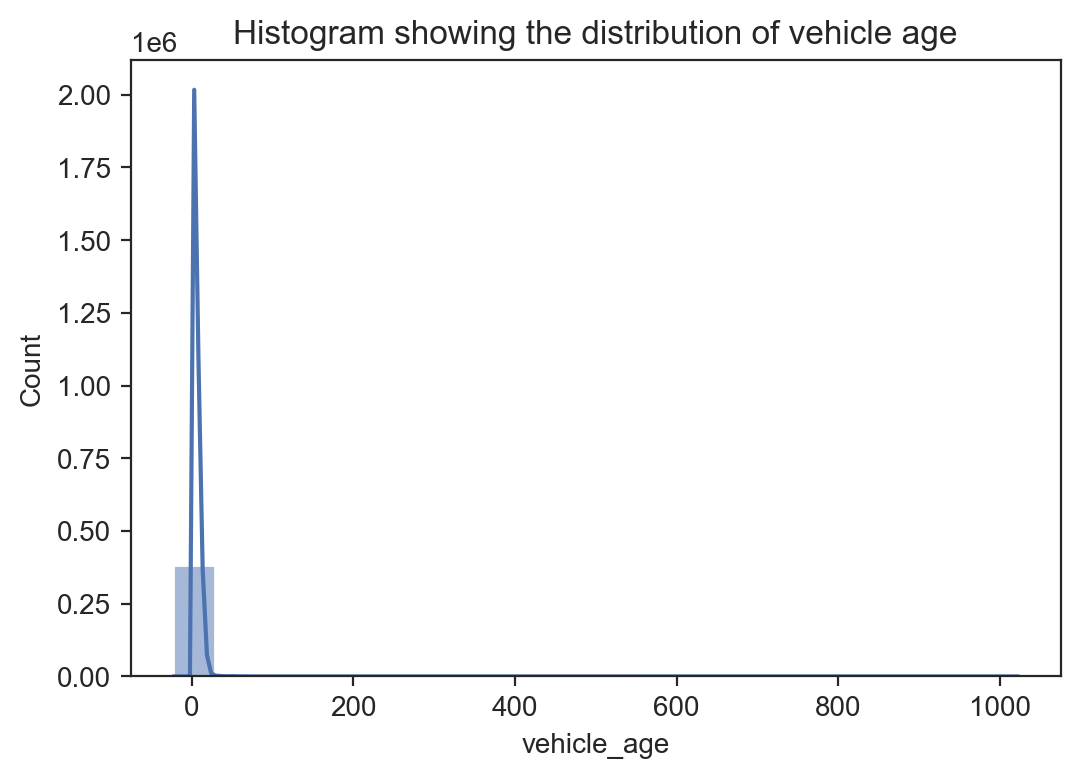

In [65]:
# let's check for outliers in the age
sns.histplot(data = car_df, x='vehicle_age', bins=20,kde=True)
plt.title("Histogram showing the distribution of vehicle age");
#This is positively skewed, it is not normally distributed

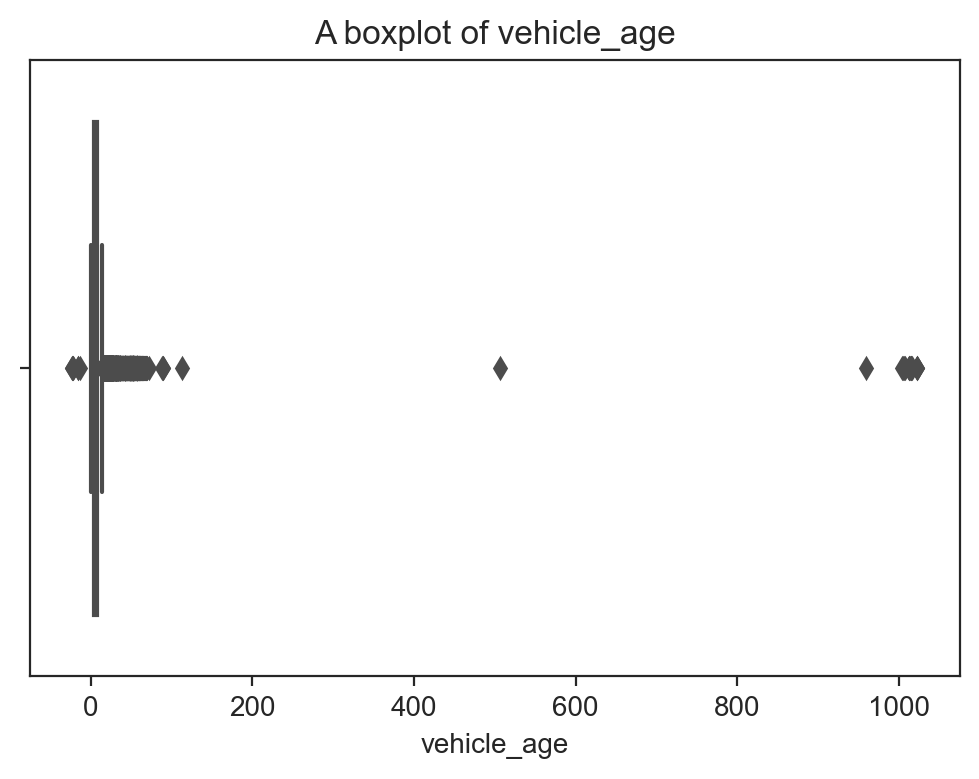

In [66]:
sns.boxplot(x=car_df['vehicle_age']);
plt.title("A boxplot of vehicle_age");

In [67]:
car_df['vehicle_age'].describe()

count    384981.000000
mean          6.473156
std           7.820904
min         -23.000000
25%           4.000000
50%           5.000000
75%           8.000000
max        1023.000000
Name: vehicle_age, dtype: float64

In [68]:
# Decision range
# Removing outliers using the vehicle_age column
# since there is no negative vals, so i will co sidere multiplying the IQR with 1.5

Q1 = car_df['vehicle_age'].quantile(0.25)
Q3 = car_df['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
car_df = car_df[(car_df['vehicle_age'] >= Q1 - 1.5 * IQR) & (car_df['vehicle_age'] <= Q3 + 1.5 * IQR)]
print("lower_val:" ,Q1 - 1.5 * IQR, "upper_val: ", Q3 + 1.5 * IQR)

lower_val: -2.0 upper_val:  14.0


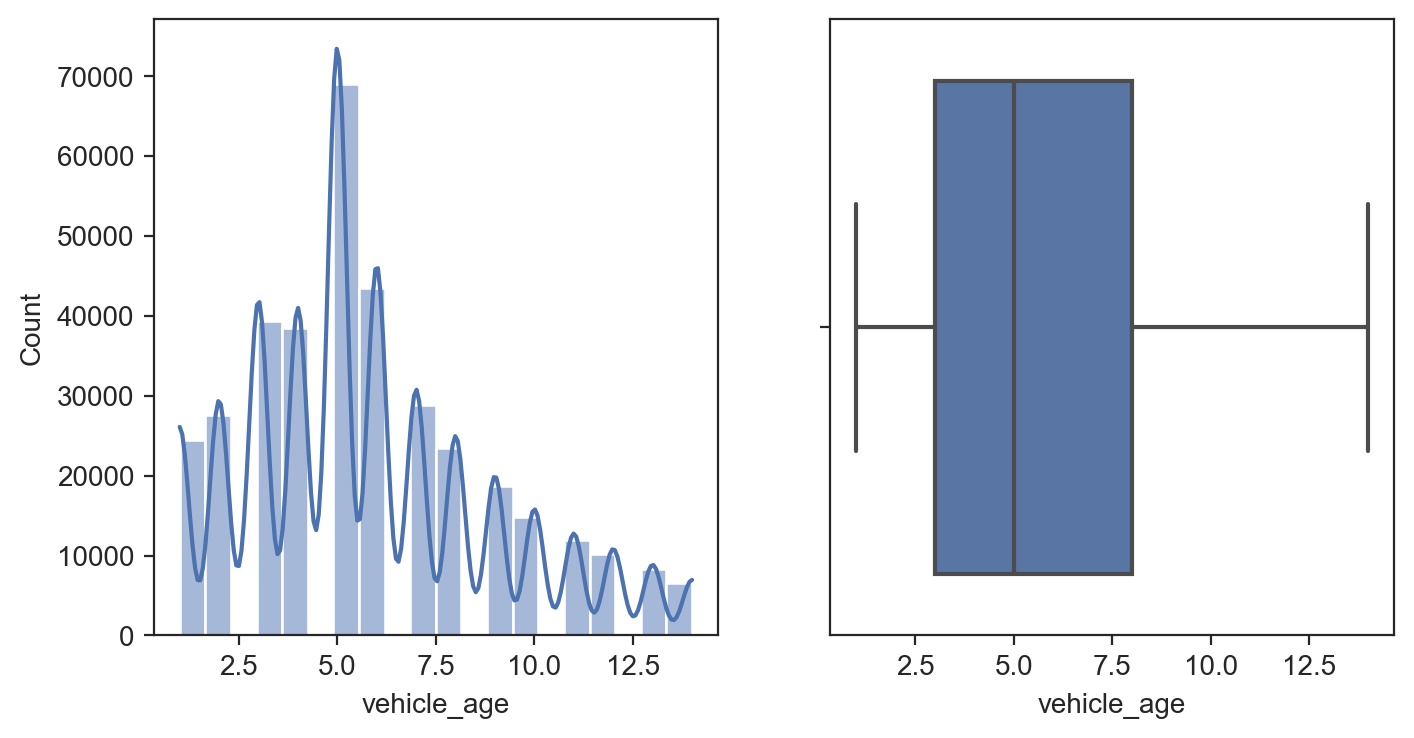

In [69]:
# the distribution after removing the ouliers
fig, ax = plt.subplots(1, 2, figsize=(8, 4));
sns.histplot(data = car_df, x='vehicle_age', bins=20,kde=True, ax=ax[0])
sns.boxplot(x=car_df['vehicle_age'], ax=ax[1]);

In [70]:
car_df['vehicle_age'].min()

1.0

In [71]:
car_df.corr()

,mileage,year_of_registration,price,vehicle_age
mileage,1.000000,-0.781388,-0.152805,0.781388
year_of_registration,-0.781388,1.000000,0.154122,-1.000000
price,-0.152805,0.154122,1.000000,-0.154122
vehicle_age,0.781388,-1.000000,-0.154122,1.000000


In [72]:
car_df['mileage_per_year'] = (car_df['mileage']/car_df['vehicle_age']).round()
car_df.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
0,0.0,Volvo,XC90,NEW,2021.0,73970,SUV,Petrol Plug-in Hybrid,1.0,0.0
1,108230.0,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel,11.0,9839.0
2,7800.0,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol,5.0,1560.0
3,45000.0,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel,6.0,7500.0
4,64000.0,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel,7.0,9143.0


In [73]:
# car_df['mileage_per_year'].isnull().sum()

In [74]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365199 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               365199 non-null  float64
 1   standard_make         365199 non-null  object 
 2   standard_model        365199 non-null  object 
 3   vehicle_condition     365199 non-null  object 
 4   year_of_registration  365199 non-null  float64
 5   price                 365199 non-null  int64  
 6   body_type             365199 non-null  object 
 7   fuel_type             365199 non-null  object 
 8   vehicle_age           365199 non-null  float64
 9   mileage_per_year      365199 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 30.6+ MB


In [75]:
# sns.boxplot(data=car_df, x='fuel_type', y='price')

In [76]:
# samp_car_df = car_df.sample(frac=0.25, random_state=0)

samp_car_df = car_df.groupby(['standard_make', 'standard_model']).sample(frac=0.05, random_state=0)

# samp_car_df =car_df

In [77]:
samp_car_df.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
282026,6465.0,Abarth,124 Spider,USED,2018.0,18599,Convertible,Petrol,4.0,1616.0
351001,3161.0,Abarth,124 Spider,USED,2019.0,19500,Convertible,Petrol,3.0,1054.0
290659,8612.0,Abarth,124 Spider,USED,2018.0,18400,Convertible,Petrol,4.0,2153.0
85015,58153.0,Abarth,500,USED,2014.0,6995,Hatchback,Petrol,8.0,7269.0
280017,77580.0,Abarth,500,USED,2011.0,4990,Hatchback,Petrol,11.0,7053.0


In [78]:
samp_car_df['vehicle_condition'].value_counts()

USED    17005
NEW      1225
Name: vehicle_condition, dtype: int64

In [79]:
# Coverting True to 1 and False to 0 for crossover_car_and_van
# samp_car_df['crossover_car_and_van'] = samp_car_df['crossover_car_and_van'].astype('int64')


In [80]:
# # converting USED to 0 and NEW to 1
# samp_car_df['vehicle_condition'] = samp_car_df['vehicle_condition'].map({'USED':0, 'NEW':1})


# samp_car_df.drop(columns=['year_of_registration', 'mileage'], inplace=True)

In [81]:
samp_car_df.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
282026,6465.0,Abarth,124 Spider,USED,2018.0,18599,Convertible,Petrol,4.0,1616.0
351001,3161.0,Abarth,124 Spider,USED,2019.0,19500,Convertible,Petrol,3.0,1054.0
290659,8612.0,Abarth,124 Spider,USED,2018.0,18400,Convertible,Petrol,4.0,2153.0
85015,58153.0,Abarth,500,USED,2014.0,6995,Hatchback,Petrol,8.0,7269.0
280017,77580.0,Abarth,500,USED,2011.0,4990,Hatchback,Petrol,11.0,7053.0


In [82]:
samp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18230 entries, 282026 to 16393
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               18230 non-null  float64
 1   standard_make         18230 non-null  object 
 2   standard_model        18230 non-null  object 
 3   vehicle_condition     18230 non-null  object 
 4   year_of_registration  18230 non-null  float64
 5   price                 18230 non-null  int64  
 6   body_type             18230 non-null  object 
 7   fuel_type             18230 non-null  object 
 8   vehicle_age           18230 non-null  float64
 9   mileage_per_year      18230 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [83]:
samp_car_df.columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'fuel_type',
       'vehicle_age', 'mileage_per_year'],
      dtype='object')

<Axes: xlabel='mileage'>

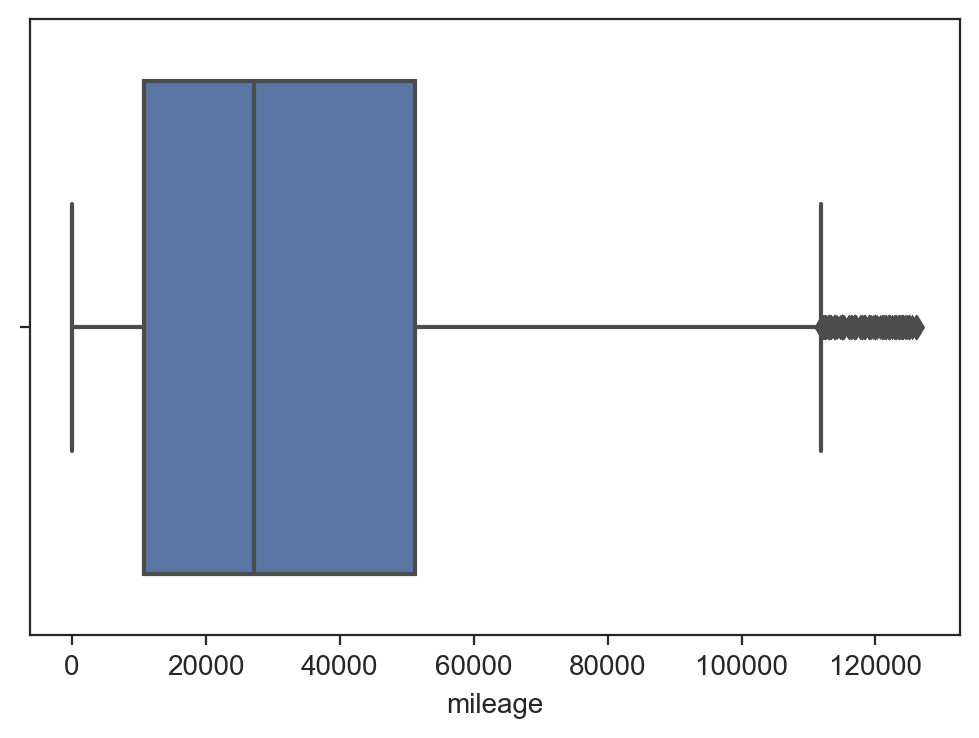

In [84]:
sns.boxplot(data = samp_car_df, x='mileage')

#You can use end of distribution to do the outliers
# sns.distplot(samp_car_df['year_of_registration'])

In [85]:
samp_car_df.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
282026,6465.0,Abarth,124 Spider,USED,2018.0,18599,Convertible,Petrol,4.0,1616.0
351001,3161.0,Abarth,124 Spider,USED,2019.0,19500,Convertible,Petrol,3.0,1054.0
290659,8612.0,Abarth,124 Spider,USED,2018.0,18400,Convertible,Petrol,4.0,2153.0
85015,58153.0,Abarth,500,USED,2014.0,6995,Hatchback,Petrol,8.0,7269.0
280017,77580.0,Abarth,500,USED,2011.0,4990,Hatchback,Petrol,11.0,7053.0


In [86]:
# for i in samp_car_df.year_of_registration:
#     samp_car_df['vehicle_reg_age'] = (2023 - samp_car_df.year_of_registration.index(i)) 

# print(list(i))

# # samp_car_df.year_of_registration[180211]



In [87]:
samp_car_df.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_age,mileage_per_year
282026,6465.0,Abarth,124 Spider,USED,2018.0,18599,Convertible,Petrol,4.0,1616.0
351001,3161.0,Abarth,124 Spider,USED,2019.0,19500,Convertible,Petrol,3.0,1054.0
290659,8612.0,Abarth,124 Spider,USED,2018.0,18400,Convertible,Petrol,4.0,2153.0
85015,58153.0,Abarth,500,USED,2014.0,6995,Hatchback,Petrol,8.0,7269.0
280017,77580.0,Abarth,500,USED,2011.0,4990,Hatchback,Petrol,11.0,7053.0


In [88]:
cat_var = ['standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type' ]

In [89]:
samp_car_cat = samp_car_df[cat_var]

In [90]:
for feat in samp_car_cat[:]:
    print(feat, ':', len(samp_car_cat[feat].unique()), 'labels')
    
#use onehotcoding for the binary labels which is vehicle condition 
#and target for those more than 2 labels

#The target should be don separately on the test and train data, to avoid data leakages
#Even standardization also should be done separately
#Data leakage: if done on the whole data, the data of the test is a also considered in its calculations
#For encoding methods that don't involve information from the entire dataset (e.g., one-hot encoding, binary encoding), you can typically encode before splitting.
#For methods that could potentially involve information from the entire dataset (e.g., target encoding), it's safer to encode after splitting to avoid data leakage

standard_make : 53 labels
standard_model : 588 labels
vehicle_condition : 2 labels
body_type : 13 labels
fuel_type : 8 labels


In [91]:
samp_car_df.corr()

,mileage,year_of_registration,price,vehicle_age,mileage_per_year
mileage,1.000000,-0.782839,-0.362660,0.782839,0.831158
year_of_registration,-0.782839,1.000000,0.376483,-1.000000,-0.437701
price,-0.362660,0.376483,1.000000,-0.376483,-0.302910
vehicle_age,0.782839,-1.000000,-0.376483,1.000000,0.437701
mileage_per_year,0.831158,-0.437701,-0.302910,0.437701,1.000000


### Feature Selection and train/test split

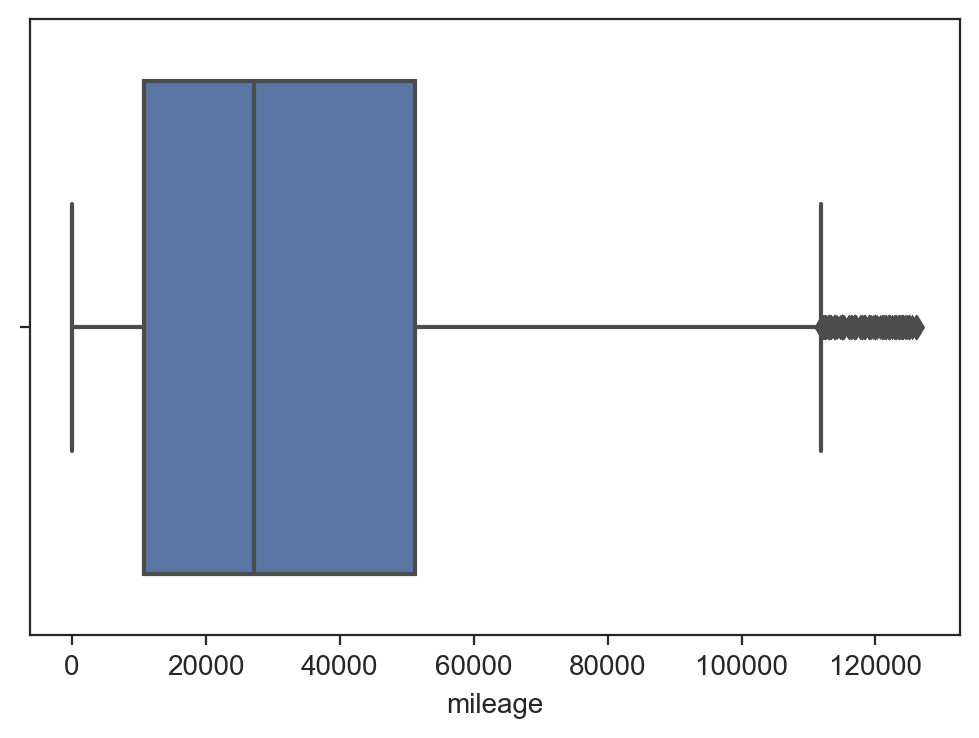

In [92]:
sns.boxplot(x=samp_car_df['mileage']);

In [93]:
# samp_car_df.drop(columns=[], inplace=True)

In [94]:
tgt = ['price']
cat_ft_oh =[ 'vehicle_condition']
cat_ft_te = [ 'standard_make', 'standard_model', 
             'body_type', 'fuel_type']
num_ft =[ 'mileage', 'year_of_registration','mileage_per_year', 'vehicle_age']

In [95]:
X = samp_car_df.drop(columns='price')
y = samp_car_df['price']

In [96]:
X.head()

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,fuel_type,vehicle_age,mileage_per_year
282026,6465.0,Abarth,124 Spider,USED,2018.0,Convertible,Petrol,4.0,1616.0
351001,3161.0,Abarth,124 Spider,USED,2019.0,Convertible,Petrol,3.0,1054.0
290659,8612.0,Abarth,124 Spider,USED,2018.0,Convertible,Petrol,4.0,2153.0
85015,58153.0,Abarth,500,USED,2014.0,Hatchback,Petrol,8.0,7269.0
280017,77580.0,Abarth,500,USED,2011.0,Hatchback,Petrol,11.0,7053.0


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Data Preparation and Transformation with pipelines

In [98]:
num_trans = Pipeline(
        steps = [
            ("scaler", MinMaxScaler())
        ]
)

In [99]:
num_trans

Pipeline(steps=[('scaler', MinMaxScaler())])

In [100]:
cat_trans_oh = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(
                sparse_output=False, 
                drop="if_binary"
            ))
        ]
)

In [101]:
cat_trans_oh

Pipeline(steps=[('encoder',
                 OneHotEncoder(drop='if_binary', sparse_output=False))])

In [102]:
cat_trans_te = Pipeline(
        steps=[
            ("encoder", TargetEncoder(target_type='continuous', 
                                      shuffle=False)),
            ("scaler", MinMaxScaler())
        ]

)

#if the shuffle is false, it prevents the value variation, at the same time
#i can do some cross validation there, but i will carry it out later

In [103]:
cat_trans_te

Pipeline(steps=[('encoder',
                 TargetEncoder(shuffle=False, target_type='continuous')),
                ('scaler', MinMaxScaler())])

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_trans, num_ft),
        ("cat_oh", cat_trans_oh, cat_ft_oh),
        ("cat_te", cat_trans_te, cat_ft_te)
    ]
)

In [105]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['mileage', 'year_of_registration',
                                  'mileage_per_year', 'vehicle_age']),
                                ('cat_oh',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['vehicle_condition']),
                                ('cat_te',
                                 Pipeline(steps=[('encoder',
                                                  TargetEncoder(shuffle=False,
                                                                target_type='continuous')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['standard_make', 'standard_model',
                                  'body_type', 'fuel_type'])])

In [106]:
X_train_pro = preprocessor.fit_transform(X_train, y_train)
# X_train

X_test_pro = preprocessor.fit_transform(X_test, y_test)

In [107]:
X_test_pro

,num__mileage,num__year_of_registration,num__mileage_per_year,num__vehicle_age,cat_oh__vehicle_condition_USED,cat_te__standard_make,cat_te__standard_model,cat_te__body_type,cat_te__fuel_type
102222,0.720397,0.615385,0.407763,0.384615,1.0,0.089971,0.063266,0.391068,0.214348
243523,0.110976,0.384615,0.041887,0.615385,1.0,0.636158,0.641650,0.451890,0.198432
331234,0.048413,0.769231,0.041105,0.230769,1.0,0.074781,0.049333,0.142538,0.324076
241914,0.105167,0.769231,0.089299,0.230769,1.0,0.139187,0.116390,0.548671,0.198432
355028,0.131270,0.846154,0.148598,0.153846,1.0,0.144971,0.140553,0.548671,0.198432
...,...,...,...,...,...,...,...,...,...
284248,0.026333,0.923077,0.044717,0.076923,1.0,0.132035,0.171184,0.541490,0.188318
370617,0.682540,0.307692,0.231806,0.692308,1.0,0.125988,0.070049,0.139355,0.207738
38523,0.476190,0.307692,0.161725,0.692308,1.0,0.049435,0.031950,0.139355,0.188318
254483,0.000000,1.000000,0.000000,0.000000,0.0,0.257117,0.295890,0.541490,0.207738


## MODEL BUILDING

#### KNN

In [108]:
knnr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("KNN_regressor", KNeighborsRegressor(n_neighbors=3))
    ]
)

In [109]:
knnr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('KNN_regressor', KNeighborsRegressor(n_neighbors=3))])

In [110]:
#This explains how the model is doing well on the train and test data
knnr.score(X_test, y_test), knnr.score(X_train, y_train)

(0.6354680657994068, 0.8818122424425483)

In [111]:
cross_val_score(knnr, X_train, y_train)

array([0.67956526, 0.70283733, 0.8288091 , 0.80578287, 0.7567396 ])

In [112]:
print("MAE on test:", mean_absolute_error(y_test, knnr.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, knnr.predict(X_train)) )

MAE on test: 3599.6384379113647
MAE on train: 2545.4374146674472


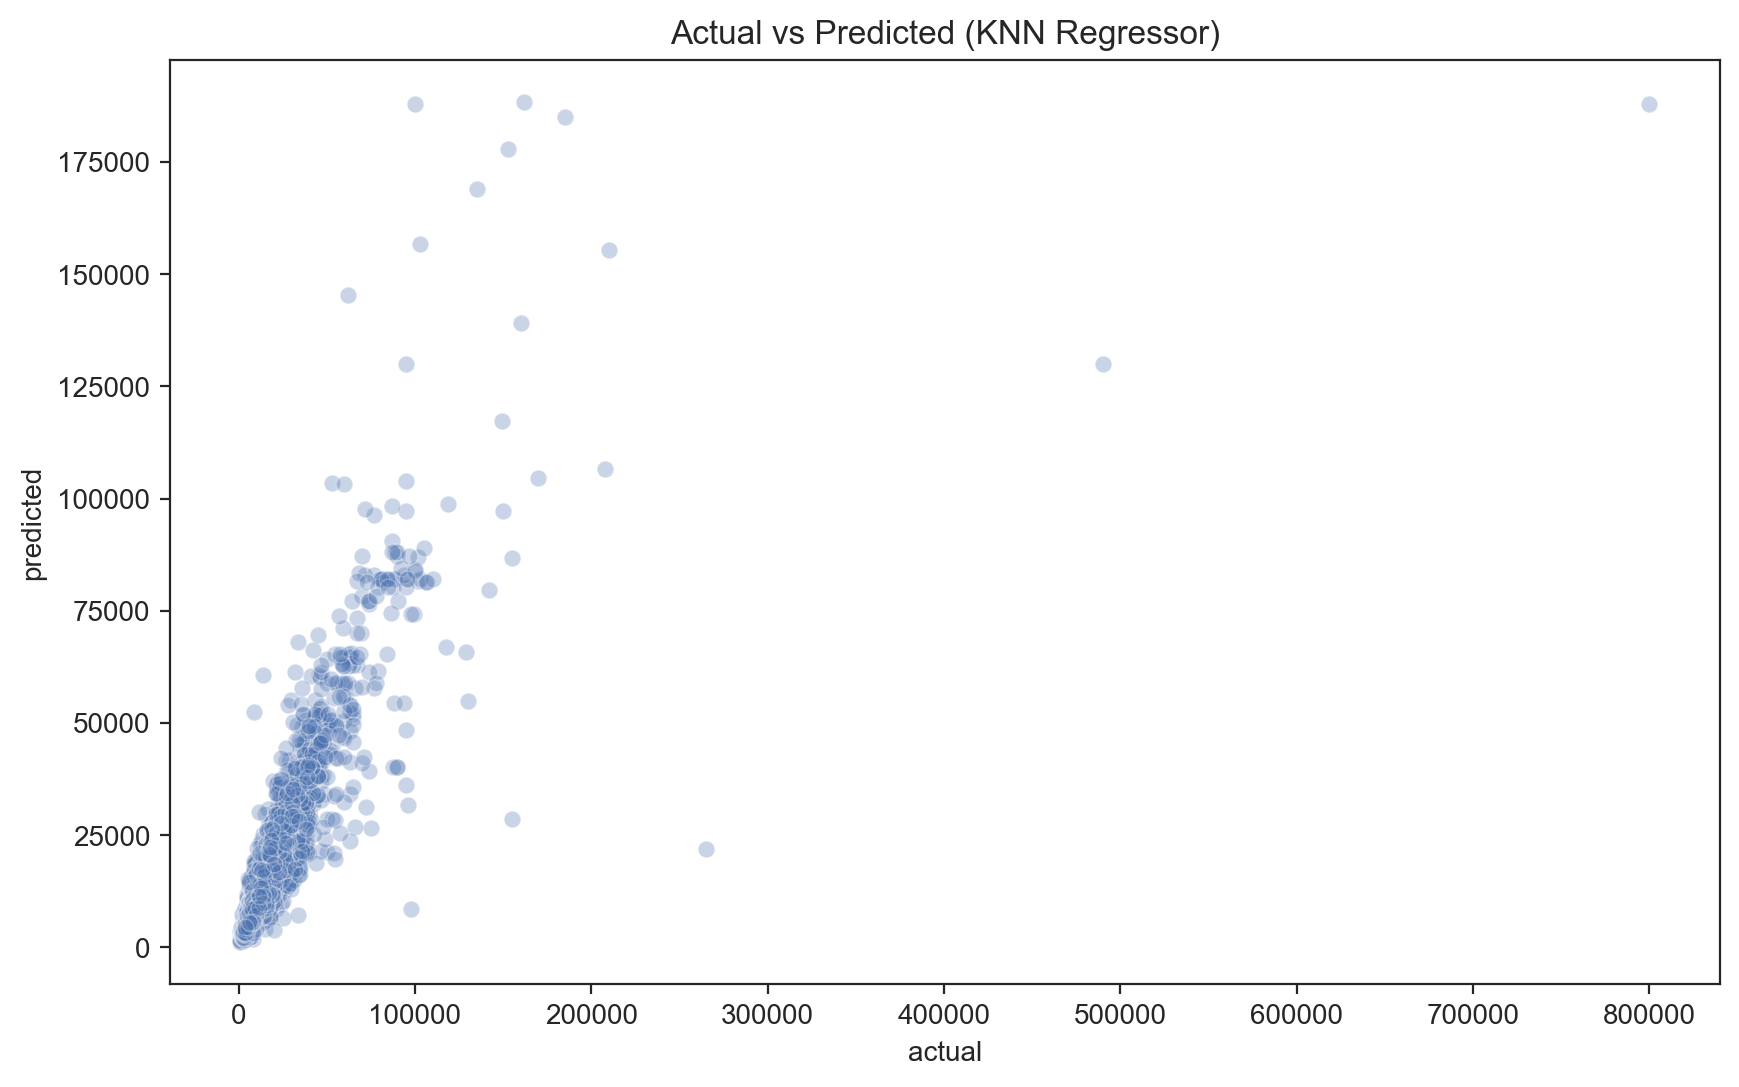

In [113]:
result = pd.DataFrame({'actual': y_test, 'predicted': knnr.predict(X_test)})

plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (KNN Regressor)');
plt.show();

In [114]:
# X_train.drop(columns=['mileage_per_year','vehicle_age'], inplace=True )
# X_test.drop(columns=['mileage_per_year','vehicle_age'], inplace=True )

In [115]:
X_train

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,fuel_type,vehicle_age,mileage_per_year
111741,97000.0,Vauxhall,Insignia,USED,2013.0,Estate,Diesel,9.0,10778.0
154154,49189.0,Vauxhall,Viva,USED,2015.0,Hatchback,Petrol,7.0,7027.0
248383,39250.0,Vauxhall,Mokka X,USED,2018.0,SUV,Petrol,4.0,9812.0
360460,22515.0,Vauxhall,Zafira Tourer,USED,2017.0,MPV,Diesel,5.0,4503.0
12217,22983.0,Volkswagen,Polo,USED,2017.0,Hatchback,Petrol,5.0,4597.0
...,...,...,...,...,...,...,...,...,...
81136,1499.0,Mercedes-Benz,CLA Class,USED,2020.0,Coupe,Petrol Plug-in Hybrid,2.0,750.0
176084,26089.0,SKODA,Octavia,USED,2015.0,Hatchback,Diesel,7.0,3727.0
72734,70332.0,Mercedes-Benz,SLK,USED,2014.0,Convertible,Diesel,8.0,8792.0
67210,47993.0,Nissan,Qashqai,USED,2017.0,SUV,Diesel,5.0,9599.0


#### hyperparamenter tunning for KNN

In [116]:
param_grid = {
    'KNN_regressor__n_neighbors': [3, 5, 7, 9],
    'KNN_regressor__weights': ['uniform', 'distance'],
    'KNN_regressor__p': [1, 2]
    #p is minkowski metric, 1 is manhattan_distance, 2 is euclidean_distance
}

In [117]:
list (ParameterGrid(param_grid))

[{'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 3,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 5,
  'KNN_regressor__p': 2,
  'KNN_regressor__weights': 'distance'},
 {'KNN_regressor__n_neighbors': 7,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'uniform'},
 {'KNN_regressor__n_neighbors': 7,
  'KNN_regressor__p': 1,
  'KNN_regressor__weights': 'distanc

In [118]:
knn_gr = GridSearchCV(knnr, param_grid, return_train_score=True)

In [119]:
knn_res = knn_gr.fit(X_train, y_train)

In [120]:
knn_res_df = pd.DataFrame(knn_res.cv_results_)

In [121]:
knn_res_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN_regressor__n_neighbors,param_KNN_regressor__p,param_KNN_regressor__weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080487,0.009457,0.108818,0.013956,3,1,uniform,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.646374,0.688377,...,0.743891,0.070218,16,0.877551,0.849338,0.882205,0.856852,0.870227,0.867235,0.012390
1,0.081091,0.004710,0.094169,0.007056,3,1,distance,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.657638,0.679517,...,0.747846,0.070683,12,0.910585,0.892792,0.925724,0.897931,0.911890,0.907784,0.011562
2,0.071037,0.009042,0.087490,0.010423,3,2,uniform,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.679565,0.702837,...,0.754747,0.057342,9,0.872513,0.851557,0.875548,0.865046,0.844260,0.861785,0.012057
3,0.065859,0.001280,0.082659,0.004811,3,2,distance,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.686448,0.694716,...,0.759054,0.059925,7,0.898472,0.884585,0.907588,0.896608,0.880090,0.893468,0.009921
4,0.064608,0.000425,0.083879,0.004285,5,1,uniform,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.666544,0.690076,...,0.747662,0.065901,13,0.863271,0.832210,0.853077,0.836784,0.839604,0.844989,0.011483


In [122]:
knn_res_df[ [
    'param_KNN_regressor__n_neighbors', 'param_KNN_regressor__p',
    'param_KNN_regressor__weights', 'params',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_KNN_regressor__n_neighbors,param_KNN_regressor__p,param_KNN_regressor__weights,params,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
7,5,2,distance,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.887753,0.007973,0.769284,0.058610,1
11,7,2,distance,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.879866,0.009263,0.764796,0.058293,2
15,9,2,distance,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.872035,0.009459,0.762552,0.061479,3
9,7,1,distance,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.884990,0.008557,0.761131,0.055598,4
13,9,1,distance,"{'KNN_regressor__n_neighbors': 9, 'KNN_regress...",0.873607,0.008271,0.759907,0.055291,5
6,5,2,uniform,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.847352,0.011729,0.759774,0.057454,6
3,3,2,distance,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.893468,0.009921,0.759054,0.059925,7
5,5,1,distance,"{'KNN_regressor__n_neighbors': 5, 'KNN_regress...",0.895361,0.009375,0.756878,0.066297,8
2,3,2,uniform,"{'KNN_regressor__n_neighbors': 3, 'KNN_regress...",0.861785,0.012057,0.754747,0.057342,9
10,7,2,uniform,"{'KNN_regressor__n_neighbors': 7, 'KNN_regress...",0.835211,0.012137,0.751766,0.057913,10


In [123]:
knn_res.best_params_

#weight is distance, therefore closer neighbours have a greater influence
#p is 2 - euclidean distance -> meaning the distance is calculated using the hypothenus

{'KNN_regressor__n_neighbors': 5,
 'KNN_regressor__p': 2,
 'KNN_regressor__weights': 'distance'}

#### Inserting the best param into the algorithm

In [124]:
bst_knnr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("KNN_regressor", KNeighborsRegressor(n_neighbors=5, 
                                              p=2,
                                              weights='distance')
        )
    ]
)

In [125]:
bst_knnr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('KNN_regressor', KNeighborsRegressor(weights='distance'))])

In [126]:
bst_knnr.score(X_test, y_test), bst_knnr.score(X_train, y_train)

(0.6266732482578266, 0.8990881844349726)

In [127]:
mean_absolute_error(y_test, bst_knnr.predict(X_test))

print("MAE on test:", mean_absolute_error(y_test, bst_knnr.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, bst_knnr.predict(X_train)) )


MAE on test: 3516.6566064882436
MAE on train: 1965.6571071298895


### Decision Tree

In [128]:
# X_train_pro is the processed dataframe

X_test_pro.head()



,num__mileage,num__year_of_registration,num__mileage_per_year,num__vehicle_age,cat_oh__vehicle_condition_USED,cat_te__standard_make,cat_te__standard_model,cat_te__body_type,cat_te__fuel_type
102222,0.720397,0.615385,0.407763,0.384615,1.0,0.089971,0.063266,0.391068,0.214348
243523,0.110976,0.384615,0.041887,0.615385,1.0,0.636158,0.641650,0.451890,0.198432
331234,0.048413,0.769231,0.041105,0.230769,1.0,0.074781,0.049333,0.142538,0.324076
241914,0.105167,0.769231,0.089299,0.230769,1.0,0.139187,0.116390,0.548671,0.198432
355028,0.131270,0.846154,0.148598,0.153846,1.0,0.144971,0.140553,0.548671,0.198432


In [129]:
#Arranging the processed X_train_pro in the same order as previous X_train
# X_train_pro.set_axis(['mileage','crossover_car_and_van','vehicle_age','vehicle_condition', 'standard_colour', 'standard_make', 'standard_model',
#         'body_type',  'fuel_type',
#        ], axis=1, inplace=True)

# X_train_pro = X_train_pro[['mileage', 'standard_colour', 'standard_make', 'standard_model',
#        'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type',
#        'vehicle_age']]

In [130]:
dtr = DecisionTreeRegressor(max_depth=3)

In [131]:
dtr.fit(X_train_pro, y_train)



DecisionTreeRegressor(max_depth=3)

In [132]:
X_train.columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'fuel_type', 'vehicle_age',
       'mileage_per_year'],
      dtype='object')

In [133]:


print(export_text(dtr, feature_names=X_train_pro.columns.to_list()))

|--- cat_te__standard_model <= 0.10
|   |--- cat_te__standard_model <= 0.04
|   |   |--- num__year_of_registration <= 0.67
|   |   |   |--- value: [7188.74]
|   |   |--- num__year_of_registration >  0.67
|   |   |   |--- value: [14202.21]
|   |--- cat_te__standard_model >  0.04
|   |   |--- num__mileage <= 0.07
|   |   |   |--- value: [34403.09]
|   |   |--- num__mileage >  0.07
|   |   |   |--- value: [17946.33]
|--- cat_te__standard_model >  0.10
|   |--- cat_te__standard_model <= 0.27
|   |   |--- num__mileage <= 0.16
|   |   |   |--- value: [68293.28]
|   |   |--- num__mileage >  0.16
|   |   |   |--- value: [36215.77]
|   |--- cat_te__standard_model >  0.27
|   |   |--- num__mileage_per_year <= 0.03
|   |   |   |--- value: [221665.79]
|   |   |--- num__mileage_per_year >  0.03
|   |   |   |--- value: [134471.62]



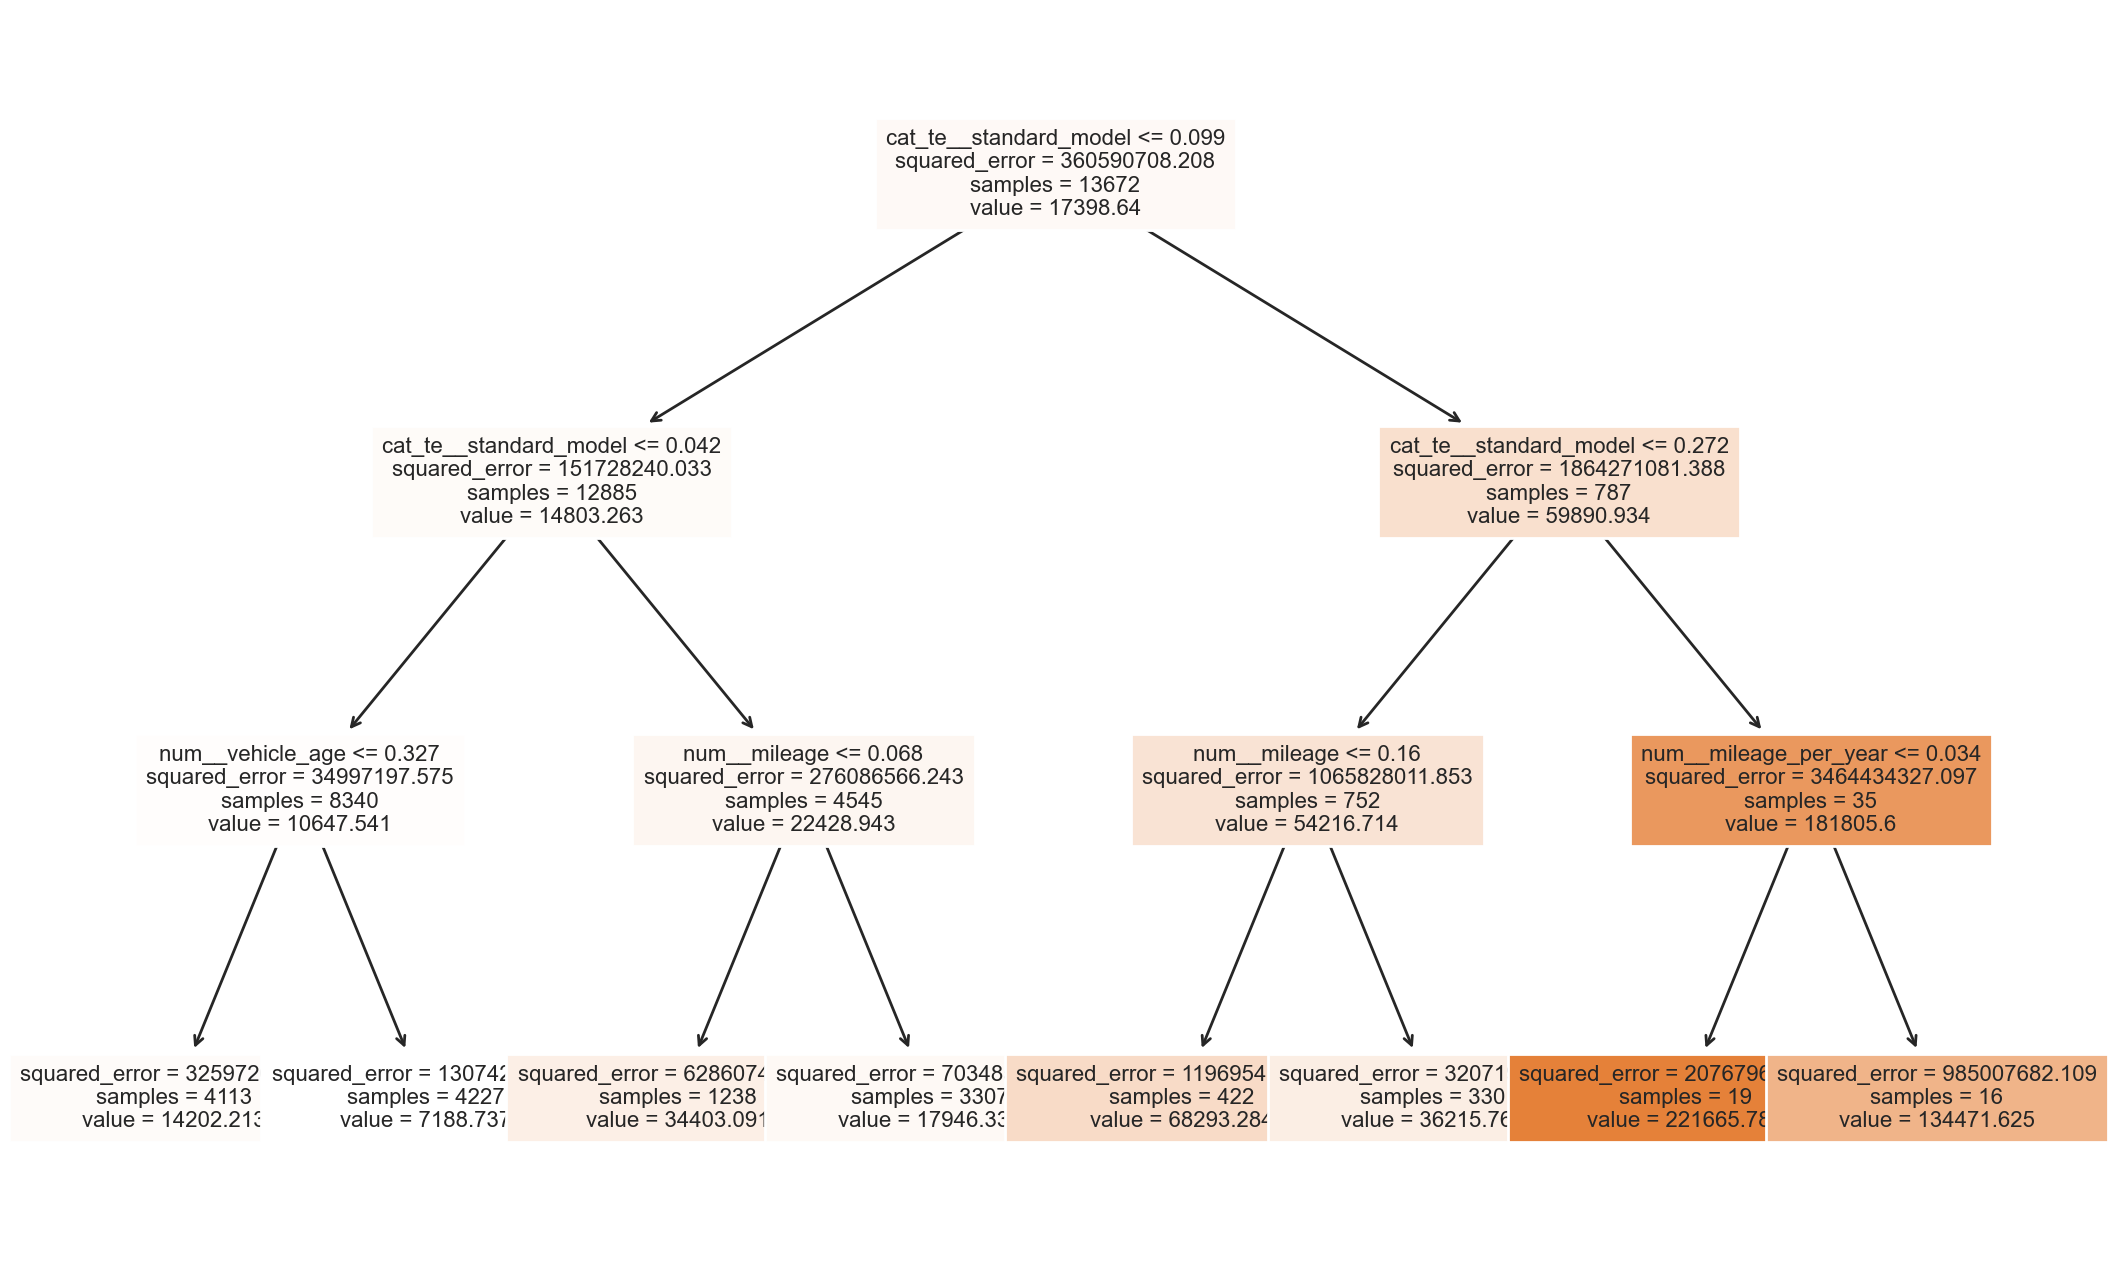

In [134]:
plt.figure(figsize=(13, 8))

tree.plot_tree(dtr.fit(X_train_pro, y_train), filled=True, feature_names=X_train_pro.columns.tolist(), fontsize=8);

plt.show()

In [135]:
mean_absolute_error(y_test, dtr.predict(X_test_pro))

# There are leakages happenening here

18241.56147315524

In [136]:
dtr.score(X_test_pro, y_test), dtr.score(X_train_pro, y_train)

#The perfomance is bad on the unseen data

(-1.0259732529041545, 0.621426277231076)

##### Hyperparameter tuning

The model isn't perfoming well on the teest data, this might seems like an 
overfitting cos it performs on the train data, let's try tunning 


In [137]:
param_grid = {
    'max_depth': [ 1, 3, 5, 8, 11 ],
    'min_samples_leaf': [ 10, 20, 30 ]
}

In [138]:
list(ParameterGrid(param_grid))

[{'max_depth': 1, 'min_samples_leaf': 10},
 {'max_depth': 1, 'min_samples_leaf': 20},
 {'max_depth': 1, 'min_samples_leaf': 30},
 {'max_depth': 3, 'min_samples_leaf': 10},
 {'max_depth': 3, 'min_samples_leaf': 20},
 {'max_depth': 3, 'min_samples_leaf': 30},
 {'max_depth': 5, 'min_samples_leaf': 10},
 {'max_depth': 5, 'min_samples_leaf': 20},
 {'max_depth': 5, 'min_samples_leaf': 30},
 {'max_depth': 8, 'min_samples_leaf': 10},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 8, 'min_samples_leaf': 30},
 {'max_depth': 11, 'min_samples_leaf': 10},
 {'max_depth': 11, 'min_samples_leaf': 20},
 {'max_depth': 11, 'min_samples_leaf': 30}]

In [139]:
gs_rgr = GridSearchCV(dtr, param_grid, return_train_score=True)

In [140]:
gs_res = gs_rgr.fit(X_train_pro, y_train)

In [141]:
gs_df = pd.DataFrame(gs_res.cv_results_)

In [142]:
gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013730,0.002626,0.003029,0.001073,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.310659,0.214384,0.320848,...,0.301408,0.048245,13,0.304663,0.329758,0.302240,0.291078,0.307070,0.306962,0.012646
1,0.011447,0.000752,0.002833,0.000713,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.310659,0.214384,0.320848,...,0.301408,0.048245,13,0.304663,0.329758,0.302240,0.291078,0.307070,0.306962,0.012646
2,0.012335,0.001157,0.002261,0.000369,1,30,"{'max_depth': 1, 'min_samples_leaf': 30}",0.310659,0.214384,0.320848,...,0.301408,0.048245,13,0.304663,0.329758,0.302240,0.291078,0.307070,0.306962,0.012646
3,0.028100,0.000794,0.002217,0.000436,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.542638,0.513125,0.714536,...,0.597632,0.069632,10,0.639248,0.650465,0.607099,0.626053,0.638666,0.632306,0.014784
4,0.028544,0.000760,0.002224,0.000390,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.533921,0.500223,0.672109,...,0.578644,0.060833,11,0.624416,0.636928,0.587734,0.604494,0.638666,0.618448,0.019616


In [143]:
gs_df[ [
    'param_max_depth', 'param_min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_max_depth,param_min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
9,8,10,0.840696,0.005217,0.788169,0.046775,1
12,11,10,0.855293,0.005919,0.784800,0.047281,2
6,5,10,0.789656,0.009363,0.754802,0.044621,3
10,8,20,0.783819,0.016668,0.723765,0.038381,4
13,11,20,0.792322,0.016379,0.723558,0.039440,5
14,11,30,0.763850,0.014836,0.715984,0.035303,6
11,8,30,0.757904,0.014945,0.714342,0.035706,7
7,5,20,0.744138,0.016603,0.702518,0.037608,8
8,5,30,0.724824,0.014846,0.694323,0.034658,9
3,3,10,0.632306,0.014784,0.597632,0.069632,10


In [144]:
print('mean_test_score :' ,gs_df.iloc[9].mean_test_score)     
print('mean_train_score :' ,gs_df.iloc[9].mean_train_score) 

mean_test_score : 0.7881692091064064
mean_train_score : 0.8406962095421715


In [145]:
best_param = gs_res.best_params_
best_param

{'max_depth': 8, 'min_samples_leaf': 10}

In [146]:
bst_dtr = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)  

In [147]:
bst_dtr.fit(X_train_pro, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

In [148]:
#The MAE reduced when the parameter were tuned accordingly, but at the same time
#the MAE is too high.
mean_absolute_error(y_test, bst_dtr.predict(X_test_pro))

16616.931607294275

In [149]:
# plt.figure(figsize=(13, 8))

# tree.plot_tree(bst_dtr.fit(X_train_pro, y_train), filled=True, feature_names=X_train_pro.columns.tolist(), fontsize=8);

# plt.show()
print(export_text(bst_dtr, feature_names=X_train_pro.columns.to_list()))

|--- cat_te__standard_model <= 0.10
|   |--- cat_te__standard_model <= 0.04
|   |   |--- num__year_of_registration <= 0.67
|   |   |   |--- num__vehicle_age <= 0.58
|   |   |   |   |--- cat_te__standard_model <= 0.03
|   |   |   |   |   |--- cat_te__standard_model <= 0.02
|   |   |   |   |   |   |--- num__vehicle_age <= 0.42
|   |   |   |   |   |   |   |--- cat_te__body_type <= 0.02
|   |   |   |   |   |   |   |   |--- value: [7247.54]
|   |   |   |   |   |   |   |--- cat_te__body_type >  0.02
|   |   |   |   |   |   |   |   |--- value: [9002.29]
|   |   |   |   |   |   |--- num__vehicle_age >  0.42
|   |   |   |   |   |   |   |--- cat_te__body_type <= 0.02
|   |   |   |   |   |   |   |   |--- value: [5848.25]
|   |   |   |   |   |   |   |--- cat_te__body_type >  0.02
|   |   |   |   |   |   |   |   |--- value: [6960.08]
|   |   |   |   |   |--- cat_te__standard_model >  0.02
|   |   |   |   |   |   |--- num__mileage <= 0.34
|   |   |   |   |   |   |   |--- num__vehicle_age <= 0.42
|  

## USING PIPELINE WITH THE DTR MODEL

In [150]:
dtr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("DTR_regressor", DecisionTreeRegressor(max_depth=9) )
    ]
)

In [151]:
dtr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('DTR_regressor', DecisionTreeRegressor(max_depth=9))])

In [152]:
dtr_pipe.score(X_test, y_test), dtr_pipe.score(X_train, y_train)

(0.6915677809195452, 0.8555276397906595)

In [153]:
print("MAE on test:", mean_absolute_error(y_test, dtr_pipe.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, dtr_pipe.predict(X_train)) )

MAE on test: 3595.16378652864
MAE on train: 2927.18683438447


In [154]:
#Although the perfomance is high but the MAE is also high at some point

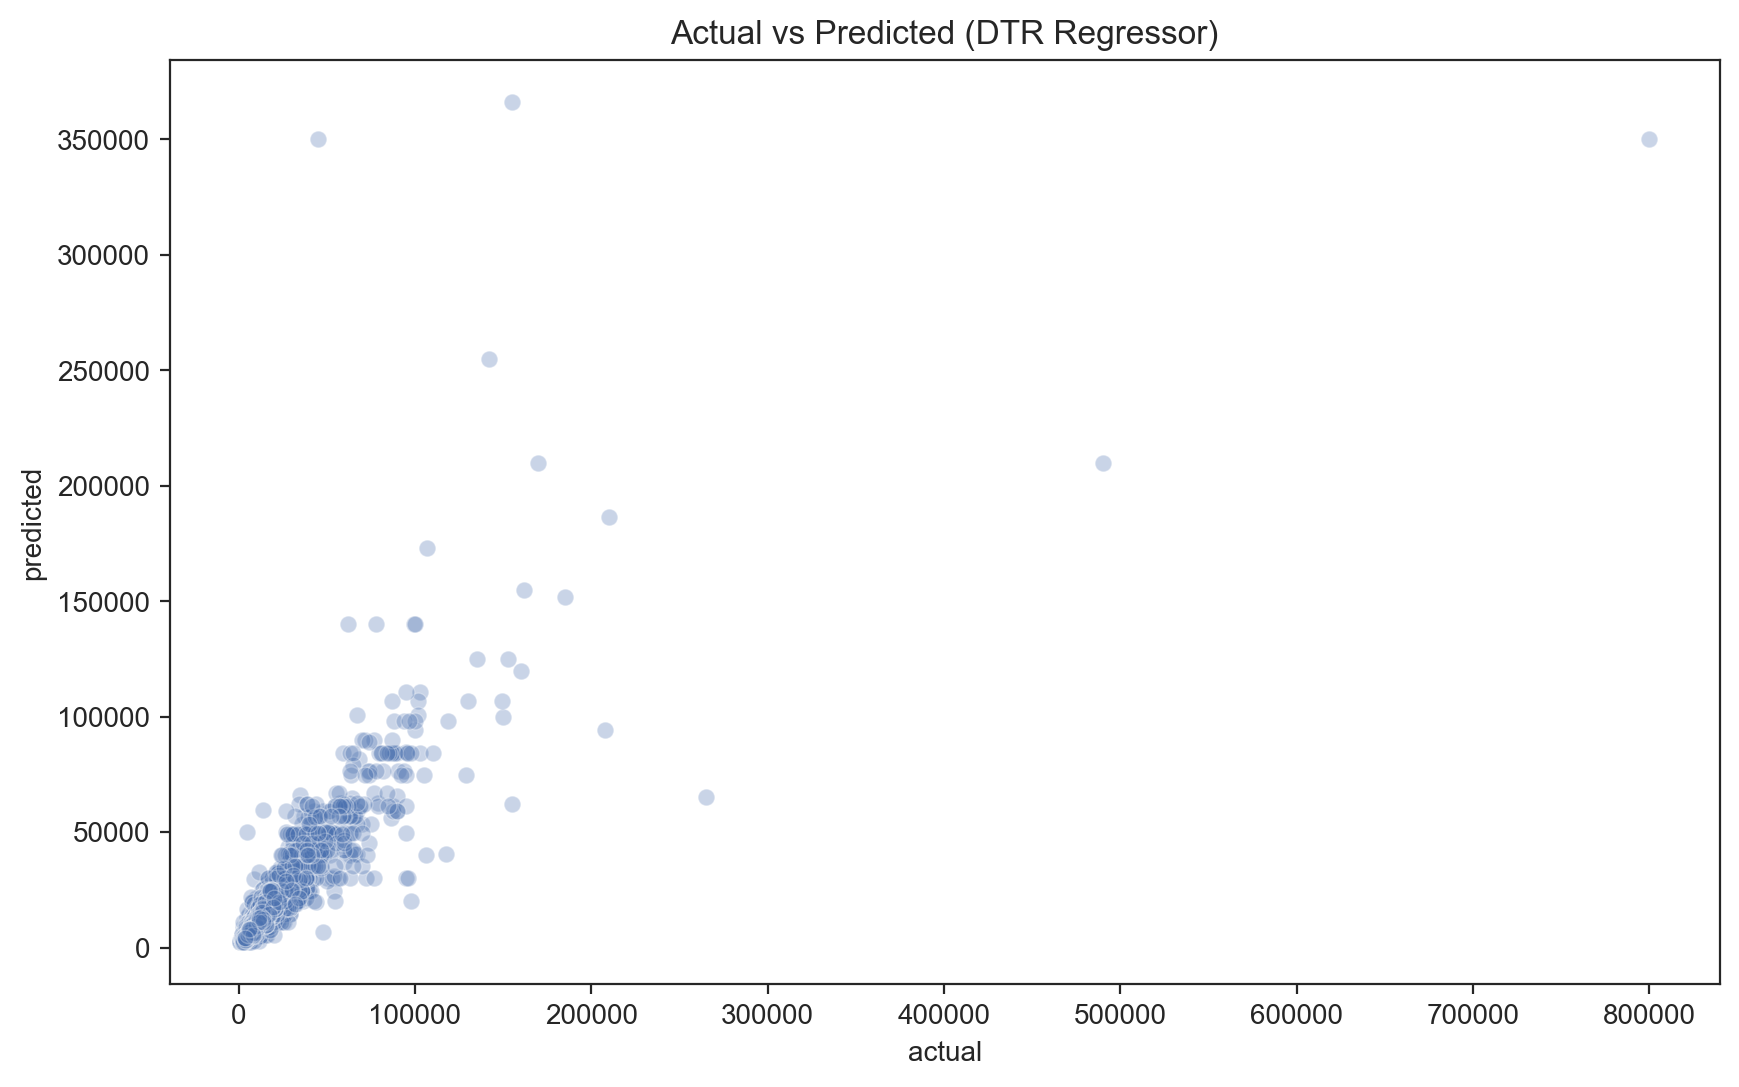

In [155]:
result = pd.DataFrame({'actual': y_test, 'predicted': dtr_pipe.predict(X_test)})
plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (DTR Regressor)');
plt.show();

In [156]:
X_train.columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'fuel_type', 'vehicle_age',
       'mileage_per_year'],
      dtype='object')

In [157]:

Dtree_reg = dtr_pipe.named_steps['DTR_regressor']
print(export_text(Dtree_reg, feature_names=X_train.columns.to_list()))
# Dtree_reg

|--- fuel_type <= 0.10
|   |--- fuel_type <= 0.04
|   |   |--- vehicle_condition <= 0.33
|   |   |   |--- vehicle_condition <= 0.17
|   |   |   |   |--- fuel_type <= 0.03
|   |   |   |   |   |--- vehicle_condition <= 0.12
|   |   |   |   |   |   |--- fuel_type <= 0.02
|   |   |   |   |   |   |   |--- vehicle_age <= 0.02
|   |   |   |   |   |   |   |   |--- fuel_type <= 0.02
|   |   |   |   |   |   |   |   |   |--- value: [10825.00]
|   |   |   |   |   |   |   |   |--- fuel_type >  0.02
|   |   |   |   |   |   |   |   |   |--- value: [14575.18]
|   |   |   |   |   |   |   |--- vehicle_age >  0.02
|   |   |   |   |   |   |   |   |--- body_type <= 0.05
|   |   |   |   |   |   |   |   |   |--- value: [17199.83]
|   |   |   |   |   |   |   |   |--- body_type >  0.05
|   |   |   |   |   |   |   |   |   |--- value: [32834.50]
|   |   |   |   |   |   |--- fuel_type >  0.02
|   |   |   |   |   |   |   |--- mileage_per_year <= 0.40
|   |   |   |   |   |   |   |   |--- fuel_type <= 0.02
|   |   |

In [158]:
# plt.figure(figsize=(13, 8))

# tree.plot_tree(dtr_pipe.fit(X_train, y_train), filled=True, feature_names=X_train.columns.tolist(), fontsize=8);

# plt.show()


#### Hyperparameter tuning

In [159]:
dtr_pipe_2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("DTR_regressor", DecisionTreeRegressor(max_depth=1))
    ]
)

In [160]:
param_grid = {
    'DTR_regressor__max_depth': [1, 3, 7, 9, 11],
    'DTR_regressor__min_samples_leaf': [10, 20, 30]
}

In [161]:
list(ParameterGrid(param_grid))

[{'DTR_regressor__max_depth': 1, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 1, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 1, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 3, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 3, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 3, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 7, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 7, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 7, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 9, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 9, 'DTR_regressor__min_samples_leaf': 20},
 {'DTR_regressor__max_depth': 9, 'DTR_regressor__min_samples_leaf': 30},
 {'DTR_regressor__max_depth': 11, 'DTR_regressor__min_samples_leaf': 10},
 {'DTR_regressor__max_depth': 11, 'DTR_regressor__

In [162]:
grs_rgr = GridSearchCV(dtr_pipe_2, param_grid, return_train_score=True)

In [163]:
grs_res = grs_rgr.fit(X_train, y_train)

In [164]:
grs_df = pd.DataFrame(grs_res.cv_results_)

In [165]:
grs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DTR_regressor__max_depth,param_DTR_regressor__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114073,0.014682,0.038501,0.008102,1,10,"{'DTR_regressor__max_depth': 1, 'DTR_regressor...",0.131412,0.223792,0.271718,...,0.254761,0.073369,13,0.302058,0.346170,0.291919,0.364012,0.345552,0.329942,0.027896
1,0.088774,0.014464,0.031788,0.007948,1,20,"{'DTR_regressor__max_depth': 1, 'DTR_regressor...",0.131412,0.223792,0.271718,...,0.254761,0.073369,13,0.302058,0.346170,0.291919,0.364012,0.345552,0.329942,0.027896
2,0.073991,0.004431,0.024975,0.002021,1,30,"{'DTR_regressor__max_depth': 1, 'DTR_regressor...",0.131412,0.223792,0.271718,...,0.254761,0.073369,13,0.302058,0.346170,0.291919,0.364012,0.345552,0.329942,0.027896
3,0.090122,0.001900,0.024504,0.002734,3,10,"{'DTR_regressor__max_depth': 3, 'DTR_regressor...",0.487062,0.536707,0.734561,...,0.592771,0.085188,10,0.688525,0.614117,0.680328,0.673497,0.648038,0.660901,0.027031
4,0.083867,0.009125,0.022567,0.003329,3,20,"{'DTR_regressor__max_depth': 3, 'DTR_regressor...",0.484609,0.514092,0.734561,...,0.588171,0.089549,11,0.680454,0.614763,0.680328,0.660383,0.649023,0.656990,0.024304


In [166]:
grs_df[ [
    'param_DTR_regressor__max_depth', 'param_DTR_regressor__min_samples_leaf',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_DTR_regressor__max_depth,param_DTR_regressor__min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
12,11,10,0.838613,0.020328,0.773950,0.070508,1
9,9,10,0.834132,0.019624,0.770104,0.072023,2
6,7,10,0.823032,0.019624,0.759503,0.075552,3
13,11,20,0.816365,0.022353,0.752882,0.073801,4
10,9,20,0.813208,0.022270,0.749299,0.075021,5
7,7,20,0.803329,0.021958,0.741229,0.077981,6
14,11,30,0.794265,0.027686,0.732356,0.078430,7
11,9,30,0.792326,0.027905,0.730441,0.079087,8
8,7,30,0.785266,0.027310,0.723474,0.080468,9
3,3,10,0.660901,0.027031,0.592771,0.085188,10


In [167]:
print('mean_test_score :' ,grs_df.iloc[12].mean_test_score)     
print('mean_train_score :' ,grs_df.iloc[12].mean_train_score) 

mean_test_score : 0.7739500782064314
mean_train_score : 0.8386125655015922


In [168]:
 best_param = grs_res.best_params_
best_param

{'DTR_regressor__max_depth': 11, 'DTR_regressor__min_samples_leaf': 10}

##### Puting in the best paramenter into the model

In [169]:
bst_dtr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("DTR_regressor", DecisionTreeRegressor(max_depth=11, min_samples_leaf=10) )
    ]
)  

In [170]:
bst_dtr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('DTR_regressor',
                 DecisionTreeRegressor(max_depth=11, min_samples_leaf=10))])

In [171]:
bst_dtr.score(X_test, y_test), bst_dtr.score(X_train, y_train)

(0.6537802143117633, 0.8481209614495139)

In [172]:
mean_absolute_error(y_test, bst_dtr.predict(X_test))

print("MAE on test:", mean_absolute_error(y_test, bst_dtr.predict(X_test)) )

print("MAE on train:", mean_absolute_error(y_train, bst_dtr.predict(X_train)) )

#there is a reduction in the MAE maing this a better moddel

MAE on test: 3483.3772613146675
MAE on train: 2909.3086191376115


In [173]:
bst_tree_reg = bst_dtr.named_steps['DTR_regressor']

print(export_text(bst_tree_reg, feature_names=X_train.columns.to_list()))

|--- fuel_type <= 0.10
|   |--- fuel_type <= 0.04
|   |   |--- vehicle_condition <= 0.33
|   |   |   |--- vehicle_condition <= 0.17
|   |   |   |   |--- fuel_type <= 0.03
|   |   |   |   |   |--- standard_make <= 0.88
|   |   |   |   |   |   |--- fuel_type <= 0.02
|   |   |   |   |   |   |   |--- fuel_type <= 0.02
|   |   |   |   |   |   |   |   |--- standard_model <= 0.05
|   |   |   |   |   |   |   |   |   |--- value: [9232.92]
|   |   |   |   |   |   |   |   |--- standard_model >  0.05
|   |   |   |   |   |   |   |   |   |--- body_type <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [7825.60]
|   |   |   |   |   |   |   |   |   |--- body_type >  0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [8510.10]
|   |   |   |   |   |   |   |--- fuel_type >  0.02
|   |   |   |   |   |   |   |   |--- standard_model <= 0.04
|   |   |   |   |   |   |   |   |   |--- value: [11630.14]
|   |   |   |   |   |   |   |   |--- standard_model >  0.04
|   |   |   |   |   |   |   |   | 

In [174]:
# plt.figure(figsize=(13, 8))

# tree.plot_tree(bst_tree_reg.fit(X_train, y_train), filled=True, feature_names=X_train.columns.tolist(), fontsize=8);

# plt.show()

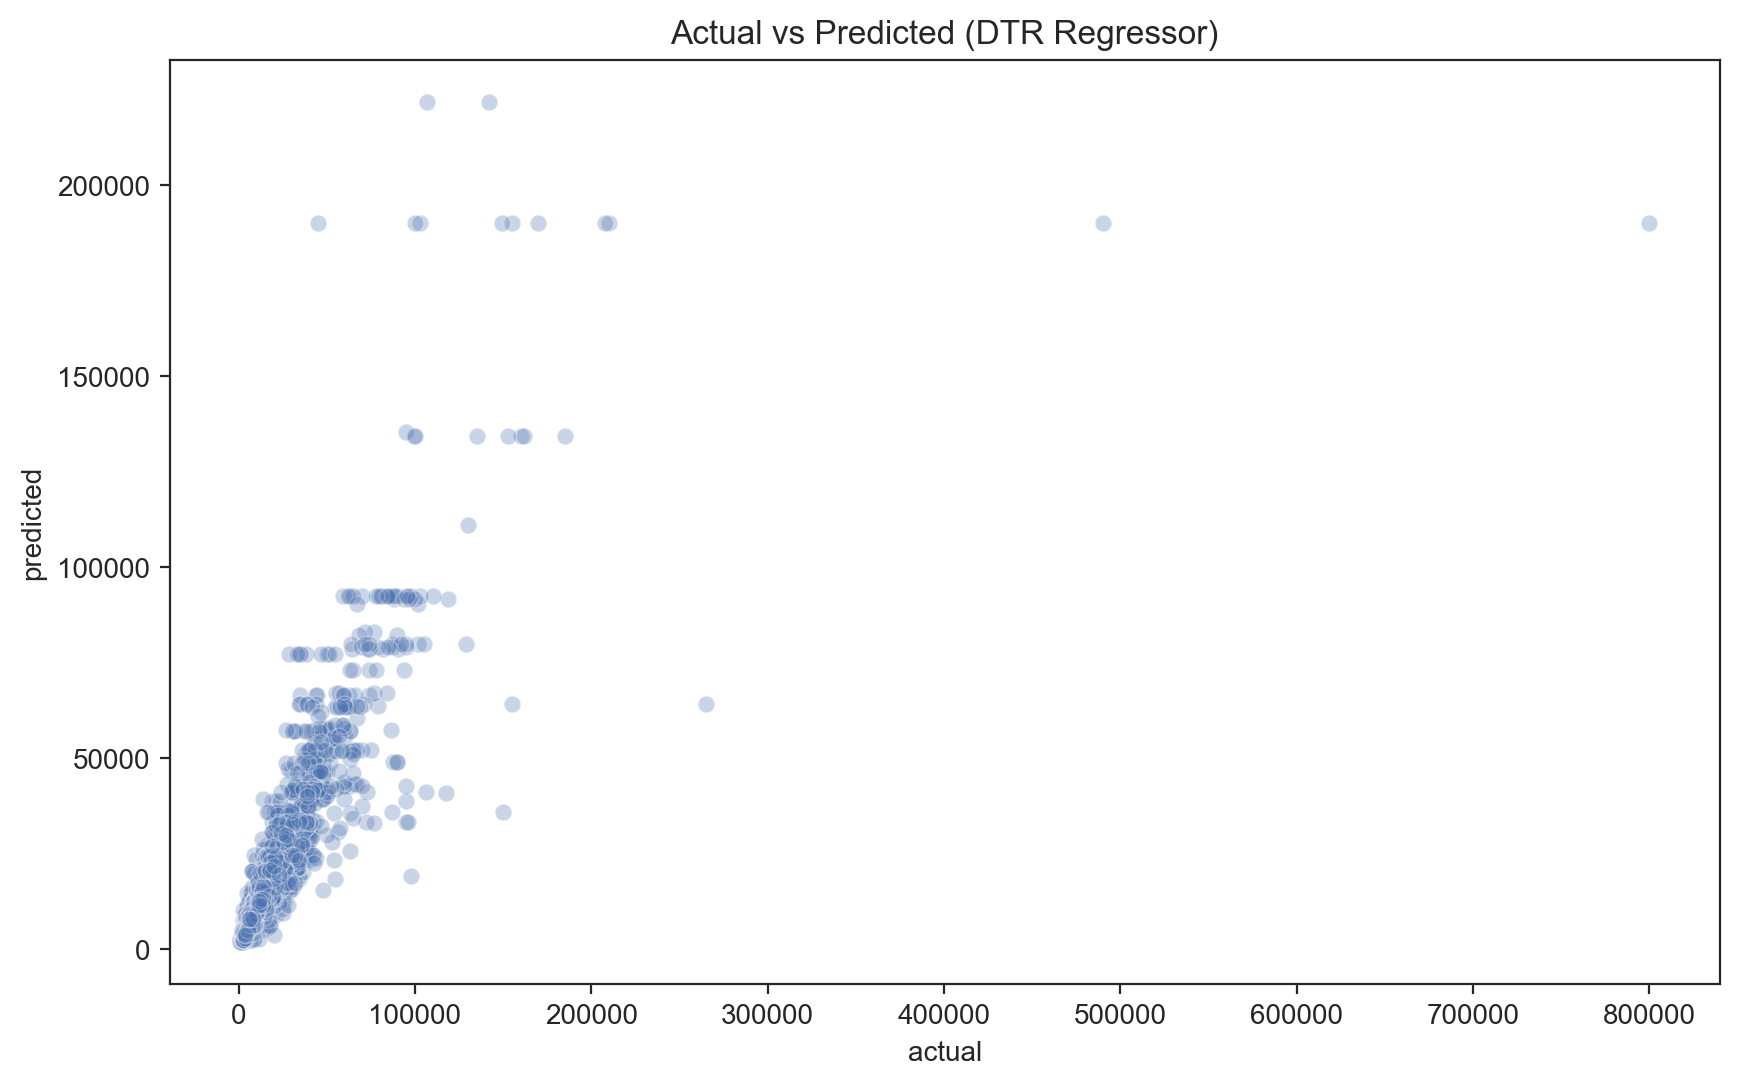

In [175]:
result = pd.DataFrame({'actual': y_test, 'predicted': bst_dtr.predict(X_test)})
plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (DTR Regressor)');
plt.show();

#### LINEAR REGRESSION

#### LR Using Pipeline

In [176]:
samp_car_df.corr()

,mileage,year_of_registration,price,vehicle_age,mileage_per_year
mileage,1.000000,-0.782839,-0.362660,0.782839,0.831158
year_of_registration,-0.782839,1.000000,0.376483,-1.000000,-0.437701
price,-0.362660,0.376483,1.000000,-0.376483,-0.302910
vehicle_age,0.782839,-1.000000,-0.376483,1.000000,0.437701
mileage_per_year,0.831158,-0.437701,-0.302910,0.437701,1.000000


In [177]:
comm = pd.concat([X_train_pro, y_train], axis=1)

comm.corr()

,num__mileage,num__year_of_registration,num__mileage_per_year,num__vehicle_age,cat_oh__vehicle_condition_USED,cat_te__standard_make,cat_te__standard_model,cat_te__body_type,cat_te__fuel_type,price
num__mileage,1.000000,-0.780708,0.834301,0.780708,0.312819,-0.015821,-0.115206,-0.033994,-0.114504,-0.370644
num__year_of_registration,-0.780708,1.000000,-0.437565,-1.000000,-0.407209,0.027314,0.144997,0.060726,0.156567,0.392549
num__mileage_per_year,0.834301,-0.437565,1.000000,0.437565,0.392201,-0.007859,-0.089612,-0.018142,-0.096180,-0.305988
num__vehicle_age,0.780708,-1.000000,0.437565,1.000000,0.407209,-0.027314,-0.144997,-0.060726,-0.156567,-0.392549
cat_oh__vehicle_condition_USED,0.312819,-0.407209,0.392201,0.407209,1.000000,0.007131,-0.076720,-0.039585,-0.156926,-0.224092
cat_te__standard_make,-0.015821,0.027314,-0.007859,-0.027314,0.007131,1.000000,0.726253,0.377651,0.053732,0.662196
cat_te__standard_model,-0.115206,0.144997,-0.089612,-0.144997,-0.076720,0.726253,1.000000,0.420284,0.122233,0.734535
cat_te__body_type,-0.033994,0.060726,-0.018142,-0.060726,-0.039585,0.377651,0.420284,1.000000,0.034193,0.351990
cat_te__fuel_type,-0.114504,0.156567,-0.096180,-0.156567,-0.156926,0.053732,0.122233,0.034193,1.000000,0.159602
price,-0.370644,0.392549,-0.305988,-0.392549,-0.224092,0.662196,0.734535,0.351990,0.159602,1.000000


In [178]:
lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("Lin_reg", LinearRegression())
    ]
)

In [179]:
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'mileage_per_year',
                                                   'vehicle_age']),
                                                 ('cat_oh',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_condition']),
                                                 ('cat_te',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder(shuffle=False,
                                                                                 target_type='continuous')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('Lin_reg', LinearRegression())])

In [180]:
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.5199149789108412, 0.7522616532693641)

In [181]:
cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-5148.49341817, -5065.04586351, -4703.31314461])

In [182]:
cross_val_score(lr, X_test, y_test, scoring='neg_mean_absolute_error', cv=3)

array([-5561.6625    , -5526.88676761, -5918.17577354])

In [183]:
y_pred = lr.predict(X_test)

In [184]:
print("MAE on test:", mean_absolute_error(y_test, y_pred) )

print("MAE on train:", mean_absolute_error(y_train, lr.predict(X_train)) )

MAE on test: 4941.37450636244
MAE on train: 4629.418885313048


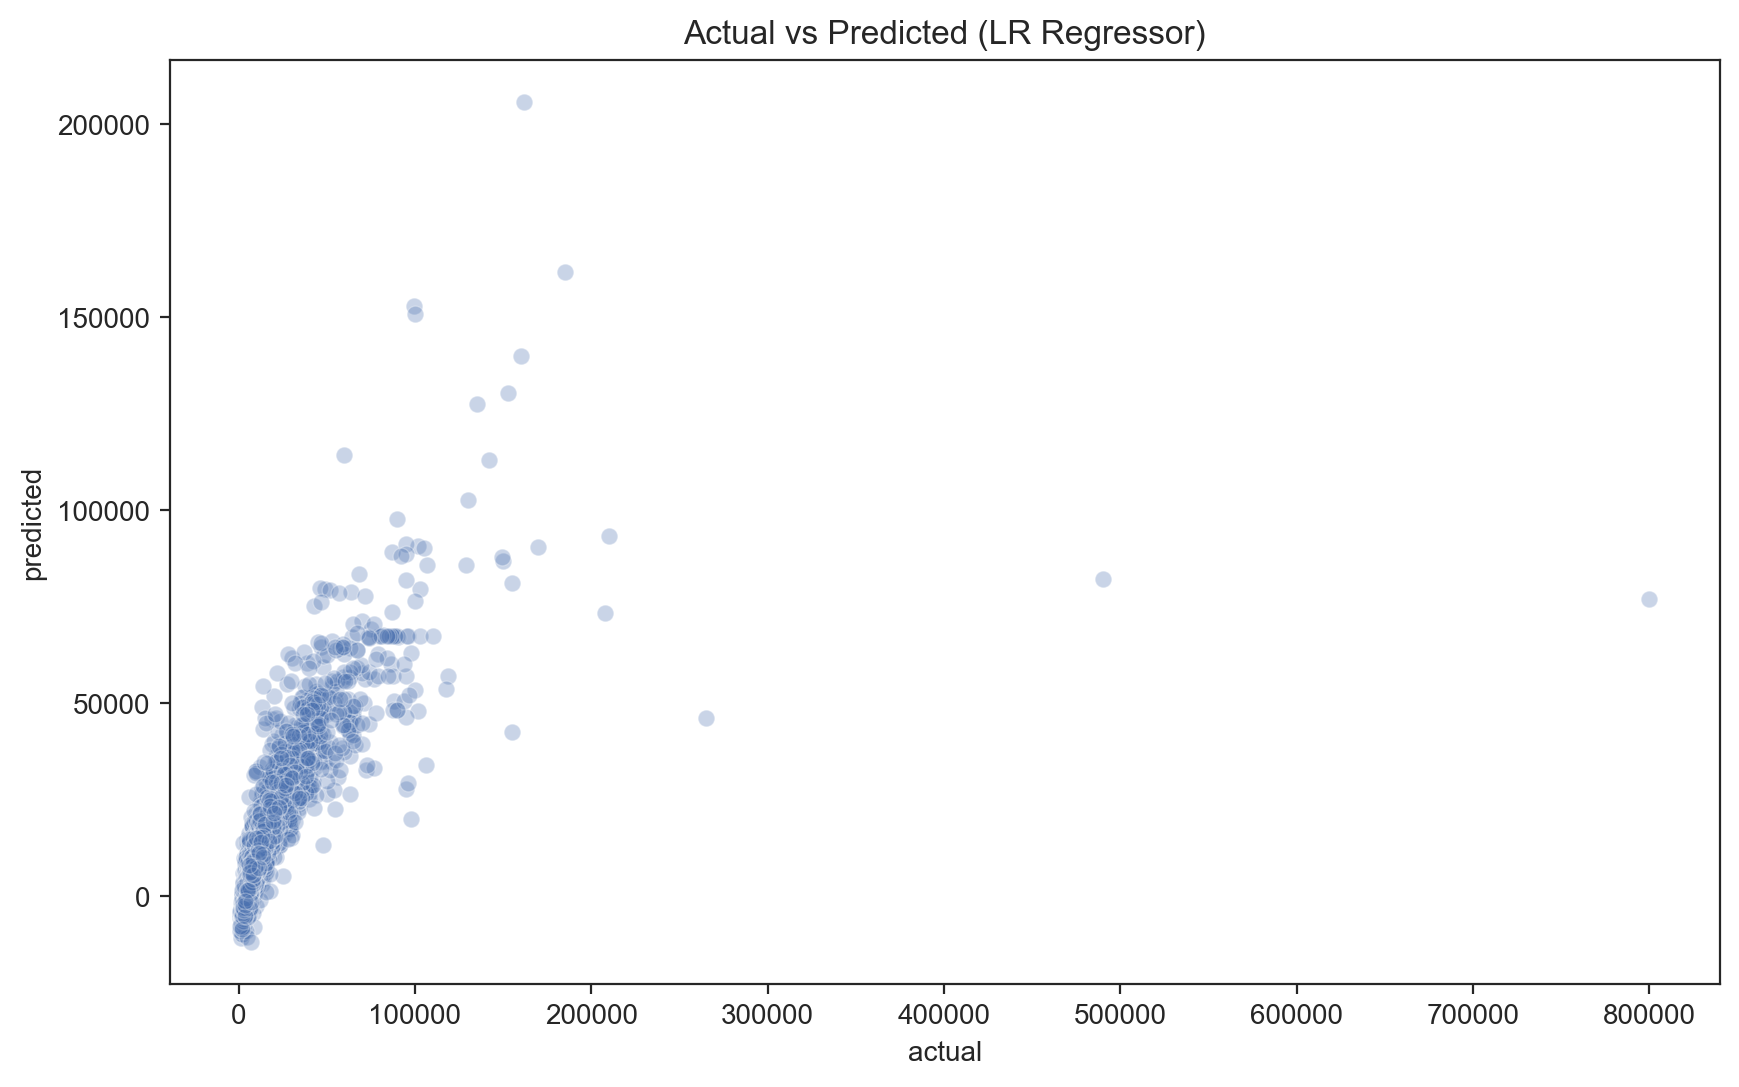

In [185]:
result = pd.DataFrame({'actual': y_test, 'predicted': lr.predict(X_test)})

plt.figure(figsize=(10,6));
sns.scatterplot(data = result, x='actual', y='predicted', alpha=0.3);
plt.title('Actual vs Predicted (LR Regressor)');
plt.show();

In [186]:
X_train.columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'fuel_type', 'vehicle_age',
       'mileage_per_year'],
      dtype='object')

In [187]:
print("coefficient :" , lr.named_steps['Lin_reg'].coef_ )
print("intercept :", lr.named_steps['Lin_reg'].intercept_)



coefficient : [ 6.18029700e+03 -6.15032821e+15 -3.37123199e+04 -6.15032821e+15
 -1.71671784e+03  7.97376403e+04  2.14322041e+05  1.67855847e+03
  6.07258201e+03]
intercept : 6150328211905288.0


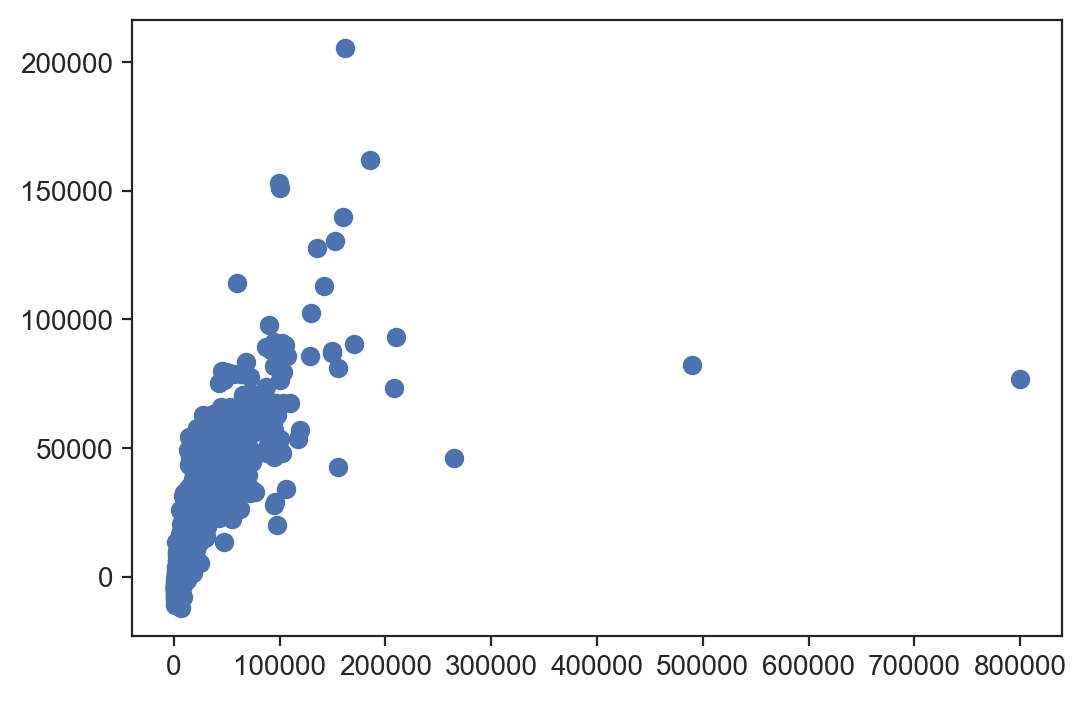

In [188]:
plt.scatter(y_test, y_pred)

In [189]:
y_test.head().to_numpy()

array([10000, 99500, 13000, 25380, 23495], dtype=int64)

In [190]:
y_pred[0:5]

array([  4961., 152903.,  15538.,  26480.,  28821.])

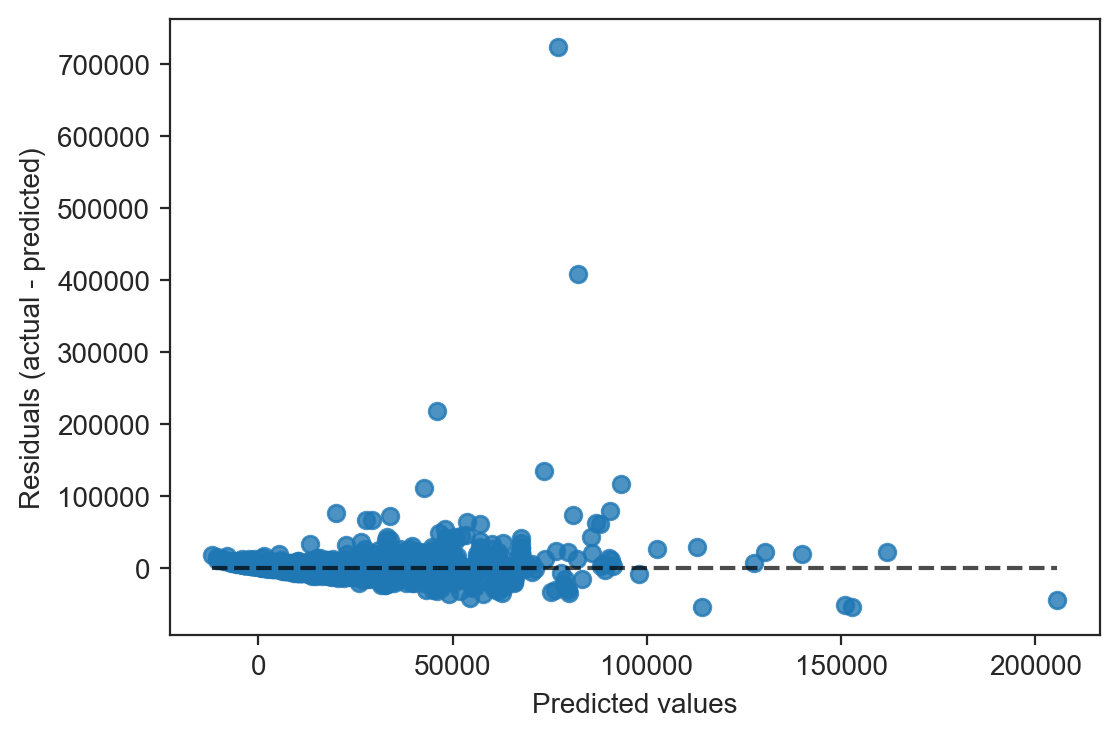

In [191]:
PredictionErrorDisplay(y_true = y_test , y_pred = y_pred).plot();

In [192]:
residuals = y_pred - y_test
residuals.max()

54219.0

<Axes: xlabel='price', ylabel='Count'>

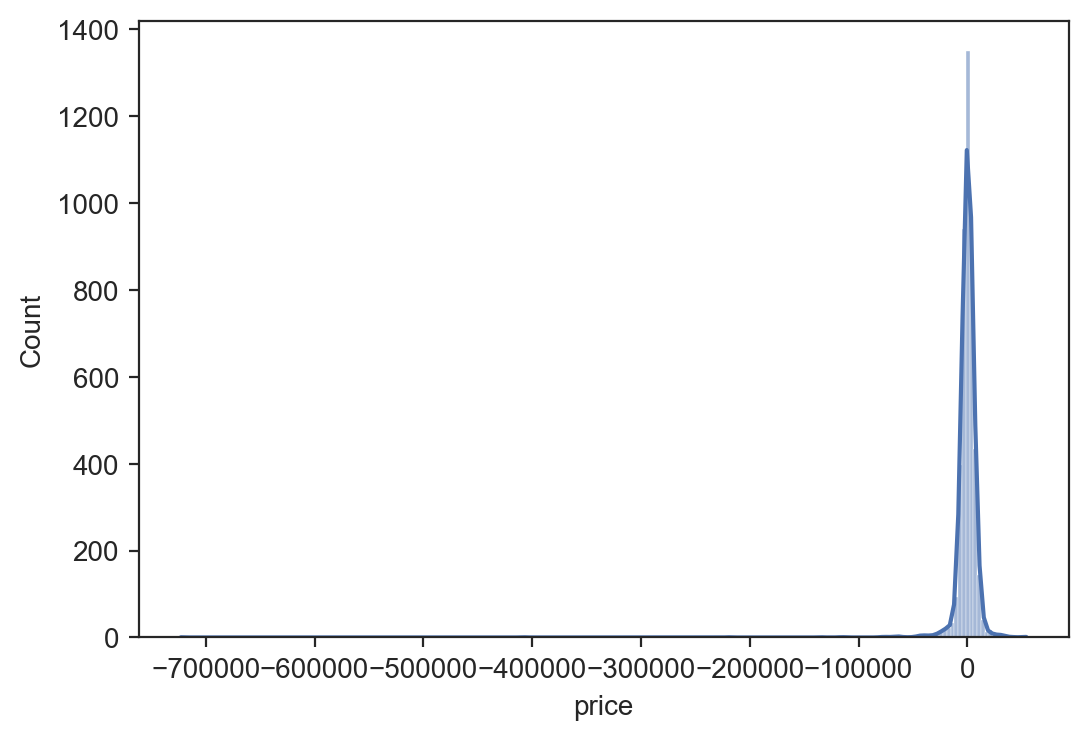

In [193]:
sns.histplot(residuals, bins=30, binrange=(-50000, max(residuals)), kde=True)

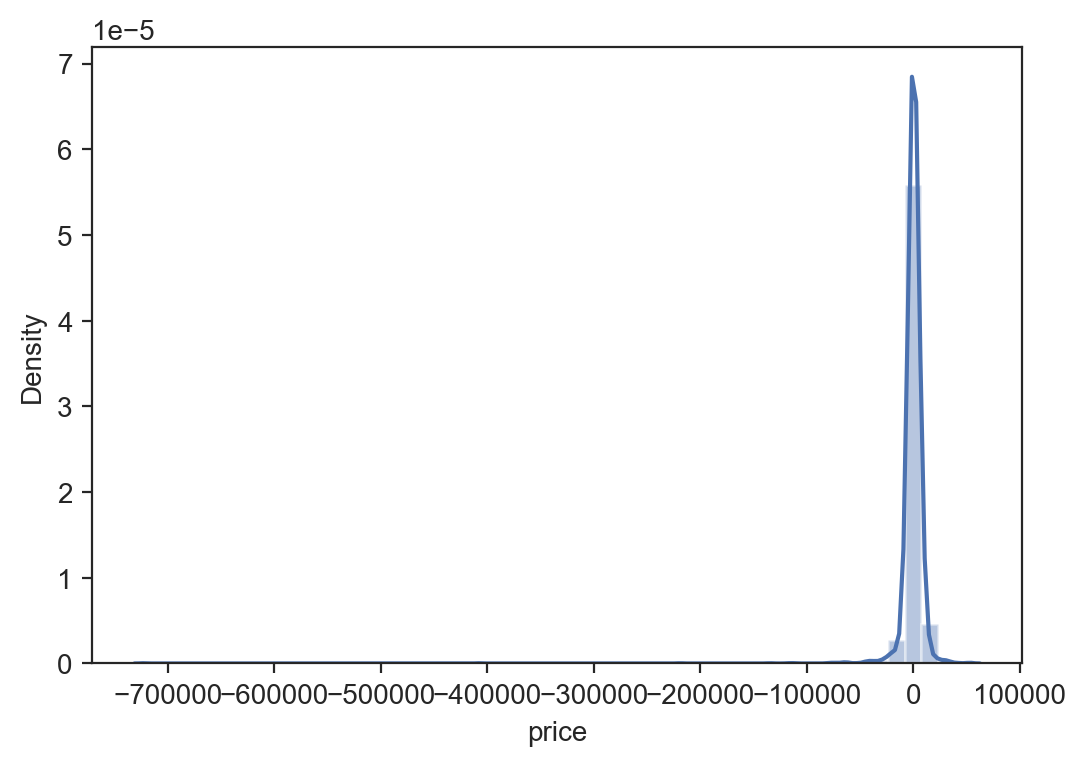

In [194]:
sns.distplot(residuals);